# RECO-SIM meeting del 1 aprile 2025

Primi dati con il cheating, **NON È STATO FATTO IL CHEATING DI BDT-TRACKSCORE** 

Analisi di alcuni marcatori che indicano quanto bene è stato fatto il cheating 

 - vertice 3D + proiezioni (lungo $z$, nelle slides)
 - L reco/true per muone e protone
 - $p$ reco/true per muone e protone
 - hit purity e hit completeness

In [151]:
import uproot

import pandas as pd
import ultraplot as plot

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

plot.rc['figure.facecolor'] = 'none'
plot.rc['savefig.facecolor'] = 'none'
plot.rc['legend.frameon'] = False
plot.rc['axes.autolimit_mode'] = 'data'

plot.rc['cmap.levels'] = 4

reco_1u1p_data = uproot.open('reco1muNp_checks.root')

nominal_1u1p = reco_1u1p_data['non_cheated/non_cheated_checks'].arrays(library='pd').sort_values('event')
cheated_1u1p = reco_1u1p_data['cheated/cheated_checks'].arrays(library='pd').sort_values('event')

# nominal_1u1p = nominal_1u1p[
#     (nominal_1u1p.event < 12_000) & (nominal_1u1p.event > 12_050) & 
#     (nominal_1u1p.event < 12_800) & (nominal_1u1p.event > 12_850) & 
#     (nominal_1u1p.event < 12_900) & (nominal_1u1p.event > 13_000)
# ] 
# cheated_1u1p = cheated_1u1p[
#     (cheated_1u1p.event < 12_000) & (cheated_1u1p.event > 12_050) & 
#     (cheated_1u1p.event < 12_800) & (cheated_1u1p.event > 12_850) & 
#     (cheated_1u1p.event < 12_900) & (cheated_1u1p.event > 13_000)
# ] 

nominal_POT = reco_1u1p_data['non_cheated/POT'].values()
cheated_POT = reco_1u1p_data['cheated/POT'].values()

In [152]:
print(f'{nominal_POT = }, {cheated_POT = }')

nominal_POT = array([6.31463216e+18]), cheated_POT = array([6.37415882e+18])


## Vertex checks 

the first value is the vertex cheated value, I.E.assigning the true vertex in the interaction

/var/folders/rz/xbjc5djs43l2yfd7lq67www80000gn/T/ipykernel_89490/1923628318.py:47: UltraPlotWarning: Calling arbitrary axes methods from SubplotGrid was deprecated in v0.8 and will be removed in a future release. Please index the grid or loop over the grid instead.
  ax.set_title('Preliminary\nArea normalized', color='r', loc='left', weight='bold')
/var/folders/rz/xbjc5djs43l2yfd7lq67www80000gn/T/ipykernel_89490/1923628318.py:57: UltraPlotWarning: Calling arbitrary axes methods from SubplotGrid was deprecated in v0.8 and will be removed in a future release. Please index the grid or loop over the grid instead.
  ax.legend(loc='ul', borderpad=1, ncols=1, )


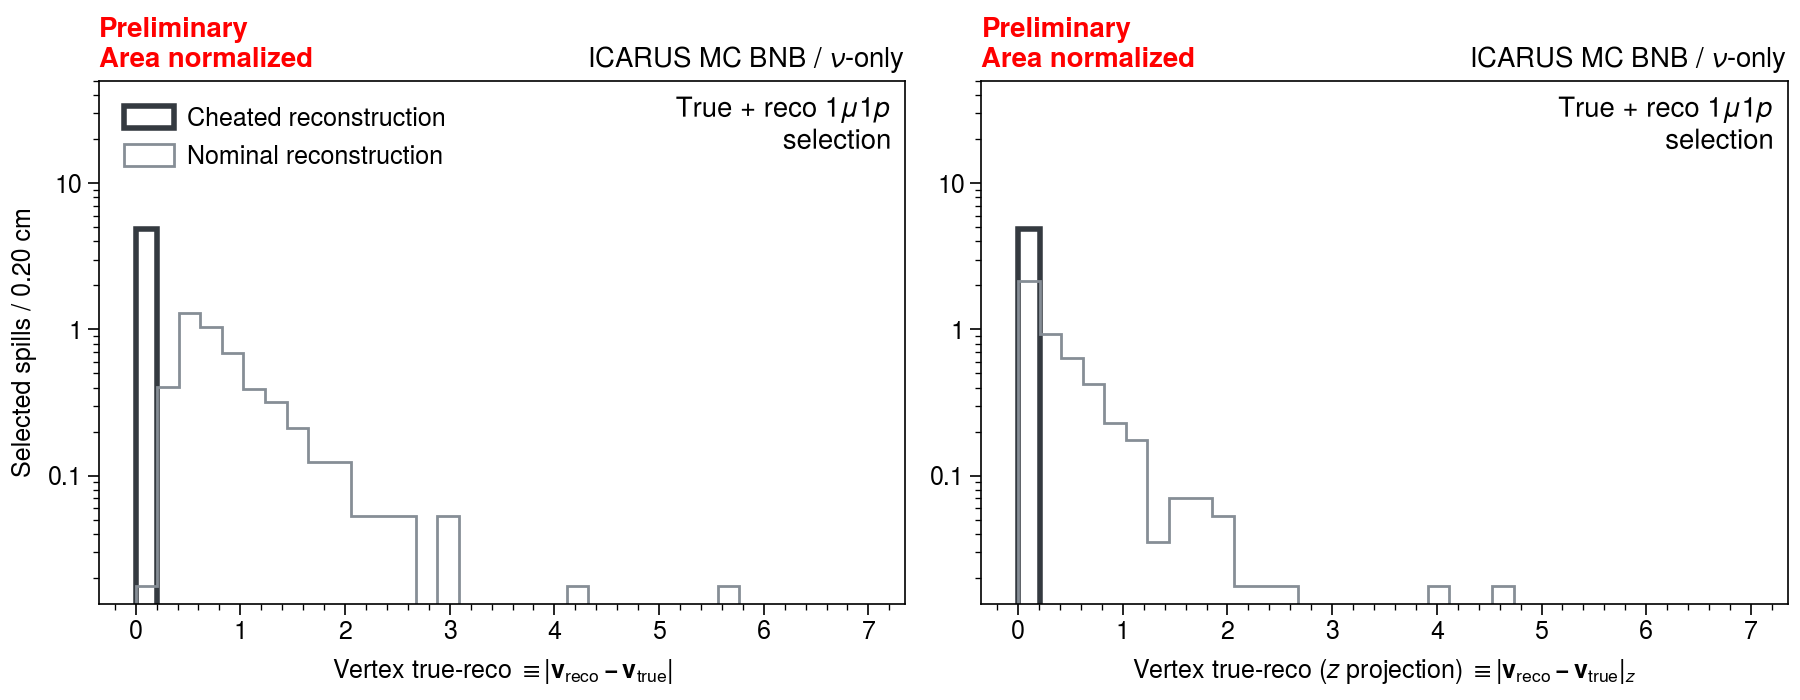

In [153]:
bins = np.linspace(0, 7, 35)

cheating_dict = {
    'color': 'gray8',
    'lw': 2,
    'ls': '-',
    'fill': False,
    'alpha': 1,
}


un_cheating_dict = {
    'color': 'gray6',
    'lw': 1,
    'ls': '-',
    'fill': False,
    'alpha': 1
}

cheating_dict_nocolor = {
    # 'color': 'gray8',
    'lw': 2,
    'ls': '-',
    'fill': False,
    # 'alpha': 0.5,
}


un_cheating_dict_nocolor = {
    # 'color': 'gray6',
    'lw': 1,
    'ls': '-',
    'fill': False,
    # 'alpha': 0.5
}

fig, ax = plot.subplots(
    width=9, height=3.5, ncols=2, nrows=1, 
    xlabel=r'Vertex true-reco $\equiv |{\bf v_\text{reco} - v_\text{true}}|$', ylabel=f'Selected spills / {(bins.max()-bins.min())/len(bins):.2f} cm',  
    titlecolor='k', share=False, grid=False, sharey='labs',
    # ultitle=f'${cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (cheated)\n${nominal_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (non cheated)',
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    urtitle='True + reco $1\\mu1p$\nselection', yscale='log'
    # suptitle='Vertex differences'
)

ax.set_title('Preliminary\nArea normalized', color='r', loc='left', weight='bold')
ax[0].hist(cheated_1u1p.vertex_difference.to_numpy(), bins=bins, **cheating_dict, density=True, label='Cheated reconstruction')
ax[0].hist(nominal_1u1p.vertex_difference.to_numpy(), bins=bins, **un_cheating_dict, density=True, label='Nominal reconstruction')
ax[0].format(ymax=50)

# ax[0].set_title('Preliminary', color='r', loc='left', weight='bold')
ax[1].hist(cheated_1u1p.vertex_difference_z.to_numpy(), bins=bins, **cheating_dict, density=True)
ax[1].hist(nominal_1u1p.vertex_difference_z.to_numpy(), bins=bins, **un_cheating_dict, density=True)
ax[1].format(ymax=50, xlabel=r'Vertex true-reco ($z$ projection) $\equiv |{\bf v_\text{reco} - v_\text{true}}|_z$')

ax.legend(loc='ul', borderpad=1, ncols=1, )
fig.savefig('vertex_selection.pdf', bbox_inches='tight')

## Hit purity and completeness

The 2D/3D cheating are validated using the hit completeness and hit purity.

We expect that when cheated those values should be higher. However there are some 

/var/folders/rz/xbjc5djs43l2yfd7lq67www80000gn/T/ipykernel_89490/3091784479.py:13: UltraPlotWarning: Calling arbitrary axes methods from SubplotGrid was deprecated in v0.8 and will be removed in a future release. Please index the grid or loop over the grid instead.
  ax.set_title('Preliminary\nArea nomalized', color='r', loc='left', weight='bold')


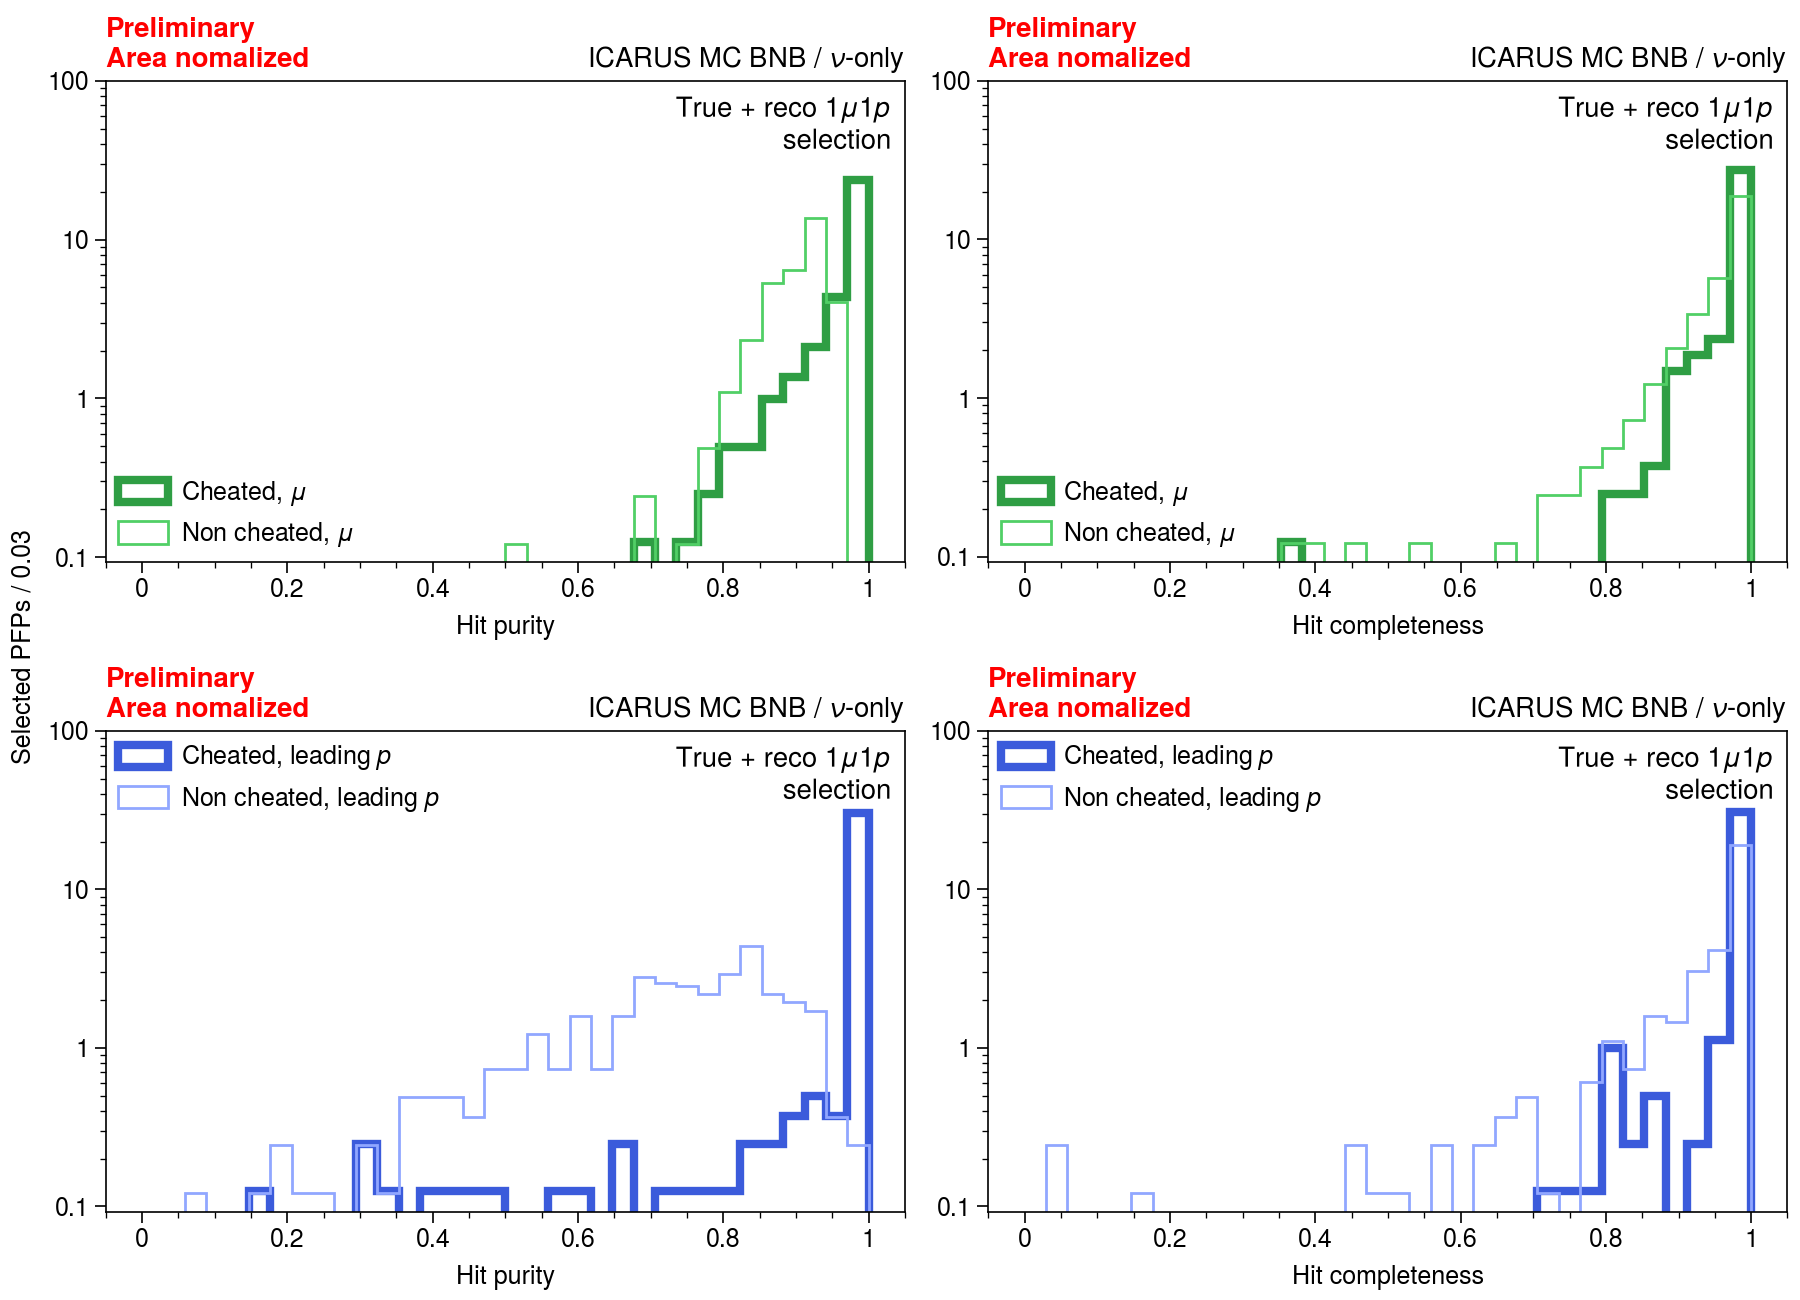

In [154]:
bins=np.linspace(0, 1, 35)

fig, ax = plot.subplots(
    width=9, height=6.5, ncols=2, nrows=2, 
    xlabel=r'Hits', ylabel=f'Selected PFPs / {(bins.max()-bins.min())/len(bins):.2f}',  
    titlecolor='k', share=False, grid=False, sharey='labs',
    # ultitle=f'${cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (cheated)\n${nominal_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (non cheated)',
    # titlesize=9,
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    urtitle='True + reco $1\\mu1p$\nselection', yscale='log'
)

ax.set_title('Preliminary\nArea nomalized', color='r', loc='left', weight='bold')

cheating_dict = {
    'lw': 3,
    'fill': False,
}

un_cheating_dict = {
    'lw': 1,
    'fill': False,
}

cheating_color = {
    'leading_proton': 'indigo8',
    'muon': 'green8'
}

un_cheating_color = {
    'leading_proton': 'indigo3',
    'muon': 'green5'
}

particle_name = {
    'leading_proton': 'leading $p$',
    'muon': '$\\mu$'
}

for idx_p, particle in enumerate(['muon', 'leading_proton']):
    for idx_l, label in enumerate(['purity', 'completeness']):
        ax[idx_p, idx_l].hist(cheated_1u1p[f'{particle}_{label}'].to_numpy(), bins=bins, **cheating_dict, density=True, 
                              color=cheating_color[particle], label=f'Cheated, {particle_name[particle]}')
        ax[idx_p, idx_l].hist(nominal_1u1p[f'{particle}_{label}'].to_numpy(), bins=bins, **un_cheating_dict, density=True, 
                              color=un_cheating_color[particle], label=f'Non cheated, {particle_name[particle]}')
        ax[idx_p, idx_l].format(xlabel=f'Hit {label}', ymax=100)

for idx_l, label in enumerate(['purity', 'completeness']):
    ax[1, idx_l].format(ultitle='')
    ax[1, idx_l].legend(loc='ul', ncols=1, order='F')


ax[0].legend(loc='ll', ncols=1)
ax[1].legend(loc='ll', ncols=1)

fig.savefig('hit_purity_completeness.pdf', bbox_inches='tight')

/var/folders/rz/xbjc5djs43l2yfd7lq67www80000gn/T/ipykernel_89490/1828969327.py:13: UltraPlotWarning: Calling arbitrary axes methods from SubplotGrid was deprecated in v0.8 and will be removed in a future release. Please index the grid or loop over the grid instead.
  ax.set_title('Preliminary', color='r', loc='left', weight='bold')


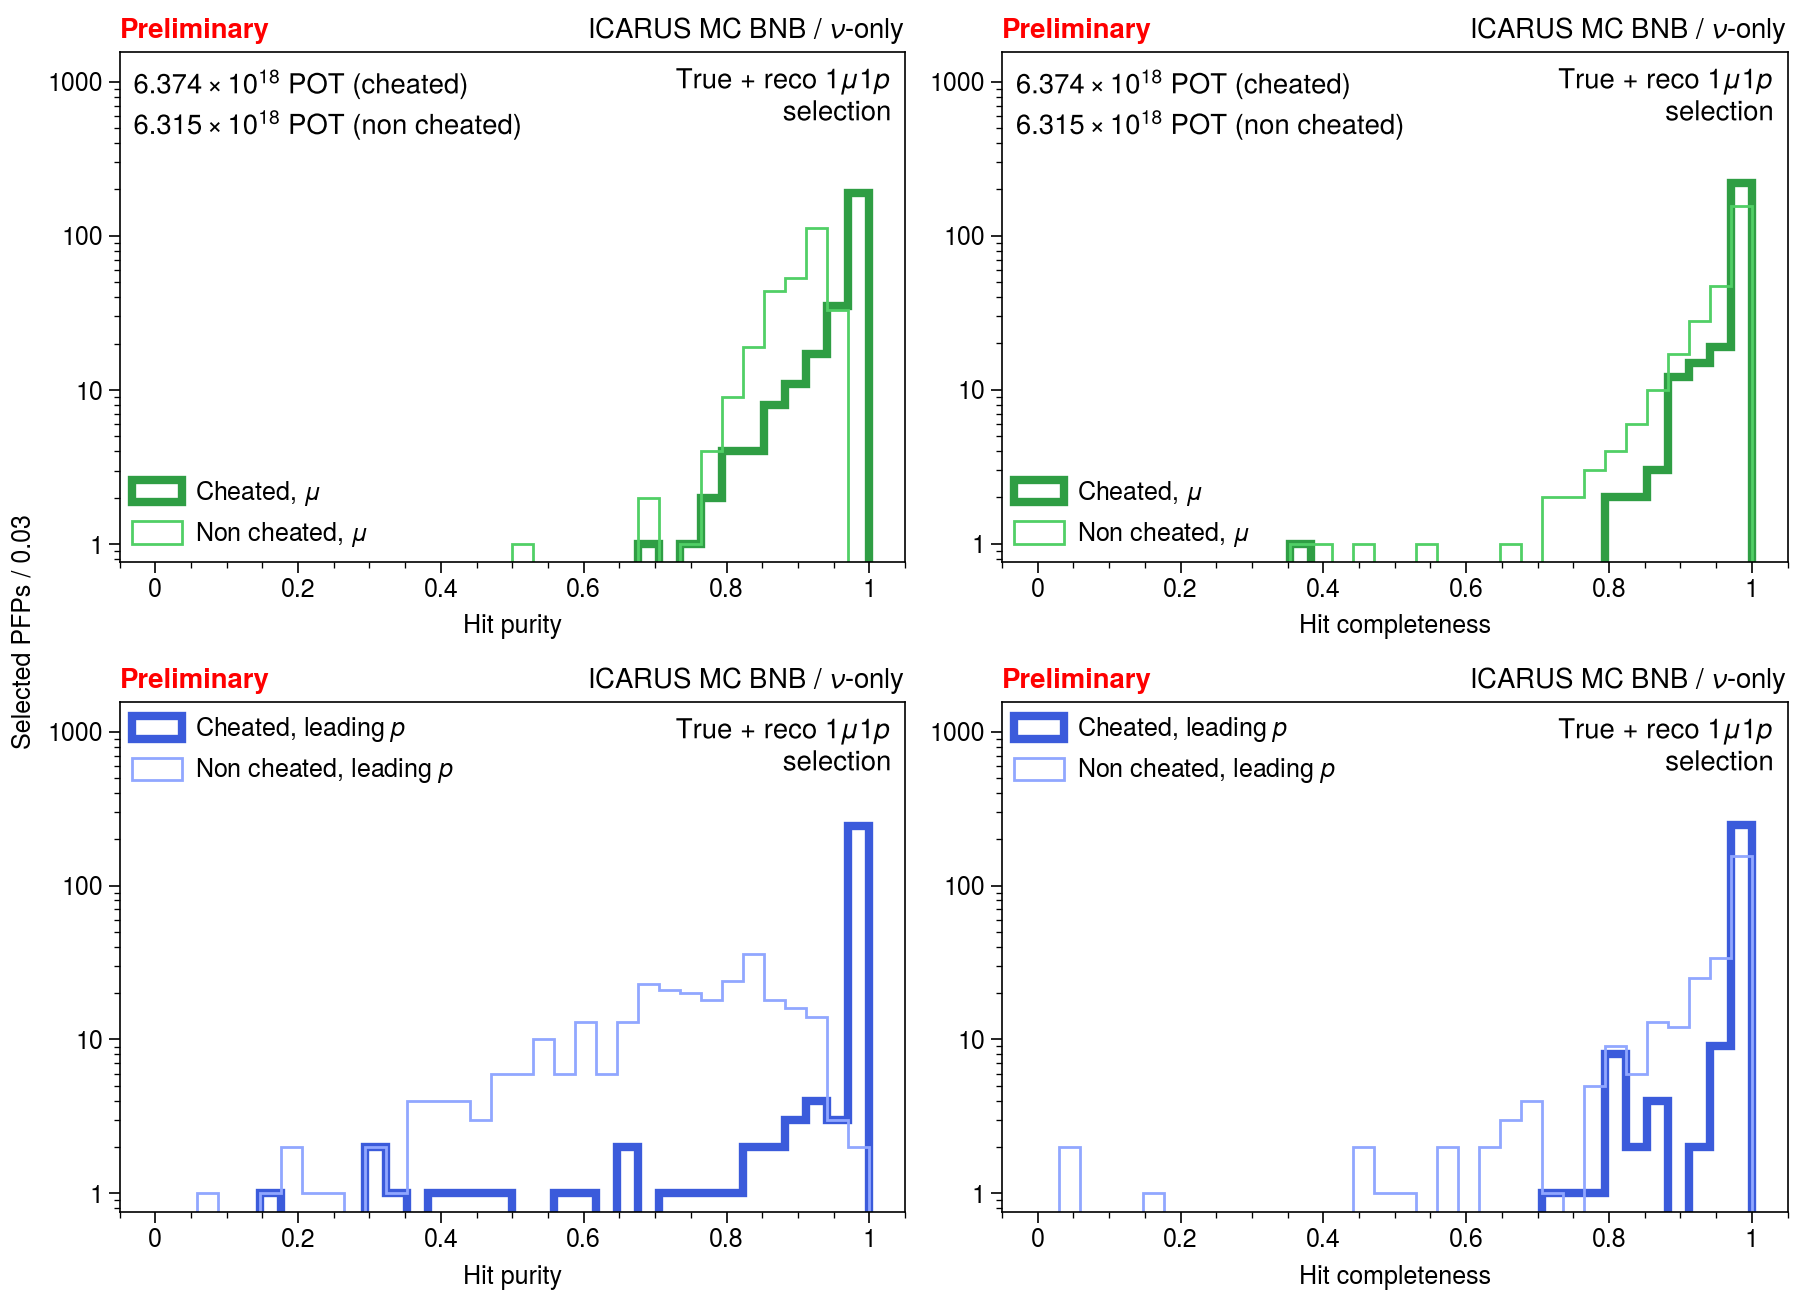

In [155]:
bins=np.linspace(0, 1, 35)

fig, ax = plot.subplots(
    width=9, height=6.5, ncols=2, nrows=2, 
    xlabel=r'Hits', ylabel=f'Selected PFPs / {(bins.max()-bins.min())/len(bins):.2f}',  
    titlecolor='k', share=False, grid=False, sharey='labs',
    ultitle=f'${cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (cheated)\n${nominal_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (non cheated)',
    # titlesize=9,
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    urtitle='True + reco $1\\mu1p$\nselection', yscale='log'
)

ax.set_title('Preliminary', color='r', loc='left', weight='bold')

cheating_dict = {
    'lw': 3,
    'fill': False,
}

un_cheating_dict = {
    'lw': 1,
    'fill': False,
}

cheating_color = {
    'leading_proton': 'indigo8',
    'muon': 'green8'
}

un_cheating_color = {
    'leading_proton': 'indigo3',
    'muon': 'green5'
}

particle_name = {
    'leading_proton': 'leading $p$',
    'muon': '$\\mu$'
}

for idx_p, particle in enumerate(['muon', 'leading_proton']):
    for idx_l, label in enumerate(['purity', 'completeness']):
        ax[idx_p, idx_l].hist(cheated_1u1p[f'{particle}_{label}'].to_numpy(), bins=bins, **cheating_dict, 
                              color=cheating_color[particle], label=f'Cheated, {particle_name[particle]}')
        ax[idx_p, idx_l].hist(nominal_1u1p[f'{particle}_{label}'].to_numpy(), bins=bins, **un_cheating_dict, 
                              color=un_cheating_color[particle], label=f'Non cheated, {particle_name[particle]}')
        ax[idx_p, idx_l].format(xlabel=f'Hit {label}', ymax=1550)

for idx_l, label in enumerate(['purity', 'completeness']):
    ax[1, idx_l].format(ultitle='')
    ax[1, idx_l].legend(loc='ul', ncols=1, order='F')


ax[0].legend(loc='ll', ncols=1)
ax[1].legend(loc='ll', ncols=1)

fig.savefig('hit_purity_completeness_not_normalized.pdf', bbox_inches='tight')

Controllo per il caso del muone, la completeness vs alcuni marker di ricostruzione
 - rapporto $R \equiv E_\text{true in hits}\ /\ E_\text{dep true}$
 - completeness del protone relativo
 - angolo tra protone e muone (due PFP collineari possono "rubarsi" un po' di hits, che Pandora non può mettere in condivisione


In [156]:
muon_4_completeness = cheated_1u1p[(cheated_1u1p.muon_completeness < 0.5) & (cheated_1u1p.muon_completeness>0)].muon_completeness.values[0]
muon_4_completeness

np.float64(0.37772926688194275)

In [157]:
cheated_1u1p[cheated_1u1p.muon_completeness == muon_4_completeness].leading_proton_completeness,         \
cheated_1u1p[cheated_1u1p.muon_completeness == muon_4_completeness].muon_R,                              \
cheated_1u1p[cheated_1u1p.muon_completeness == muon_4_completeness].CT3D_muon_leading_proton_from_rangeP

(540    1.0
 Name: leading_proton_completeness, dtype: float64,
 540    0.1329
 Name: muon_R, dtype: float64,
 540    0.462091
 Name: CT3D_muon_leading_proton_from_rangeP, dtype: float64)

Bad µ in completeness = 0.3777, R = 0.1329


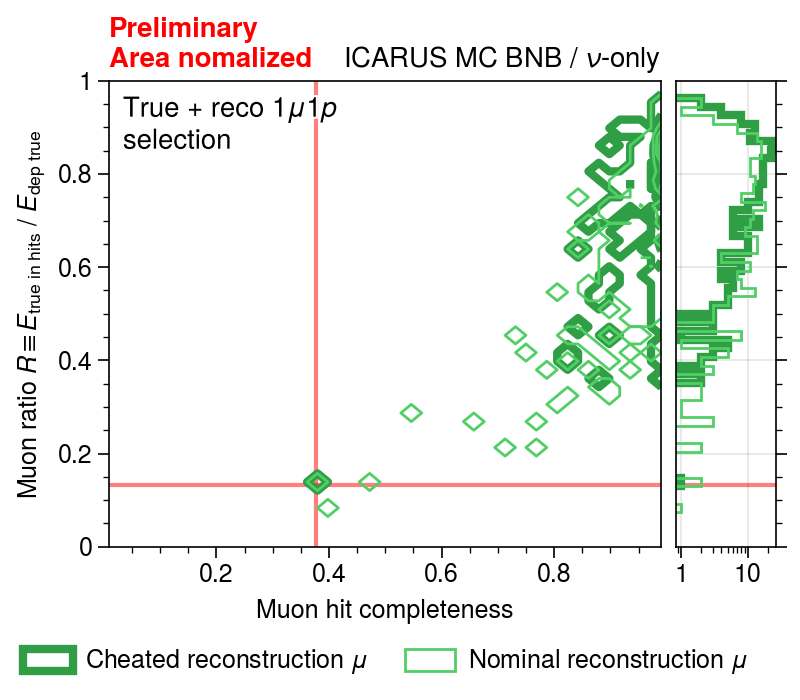

In [158]:
fig, ax = plot.subplots(
    width=4, height=3.5, ncols=1, nrows=1, 
    titlecolor='k', share=False, grid=False, sharey='labs',
    # ultitle=f'${cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (cheated)\n${nominal_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (non cheated)',
    # titlesize=9,
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    ultitle='True + reco $1\\mu1p$\nselection'
)

bin_completeness = np.linspace(0, 1, 55)
bin_R = np.linspace(0, 1, 55)
ax.set_title('Preliminary\nArea nomalized', color='r', loc='left', weight='bold')

cheated_dict = {
    'lw': 3,
    'color': 'green8',
    # 'marker': 'o'
}

nominal_dict = {
    'lw': 1,
    'color': 'green5',
    # 'marker': '+'
}

for data, properties in zip([cheated_1u1p, nominal_1u1p], [cheated_dict, nominal_dict]):
    H, xe, ye = np.histogram2d(x=data['muon_completeness'], y=data['muon_R'], bins=(bin_completeness, bin_R), density=True)
    # ax.scatter(x=data[data.muon_R>-5].muon_completeness, y=data[data.muon_R>-5].muon_R, **properties, alpha=0.5)
    ax.contour(xe, ye, H.T, **properties)
panel = ax.panel(side='r')

for data, properties, label in zip([cheated_1u1p, nominal_1u1p], [cheated_dict, nominal_dict], ['Cheated reconstruction $\\mu$', 'Nominal reconstruction $\\mu$']):
    panel.hist(data.muon_R, bins=bin_R, **properties, label=label, fill=False, orientation='horizontal')

ax.format(xlabel='Muon hit completeness', ylim=(0, 1))
panel.format(ylabel=r'Muon ratio $R \equiv E_\text{true in hits}\ /\ E_\text{dep true}$', xscale='log', ylim=(0, 1))


ax.axvline(muon_4_completeness, color='r', alpha=0.5, zorder=1)
ax.axhline(cheated_1u1p[cheated_1u1p.muon_completeness == muon_4_completeness].muon_R.values, color='r', alpha=0.5, zorder=1)
panel.axhline(cheated_1u1p[cheated_1u1p.muon_completeness == muon_4_completeness].muon_R.values, color='r', alpha=0.5, zorder=1)

print(f'Bad µ in completeness = {muon_4_completeness:.4f}, R = {cheated_1u1p[cheated_1u1p.muon_completeness == muon_4_completeness].muon_R.values[0]:.4f}')

fig.legend(loc='b')
fig.savefig('muon_completeness_R.pdf', bbox_inches='tight')

Bad µ in µ completeness = 0.3777, p completeness = 1.0000


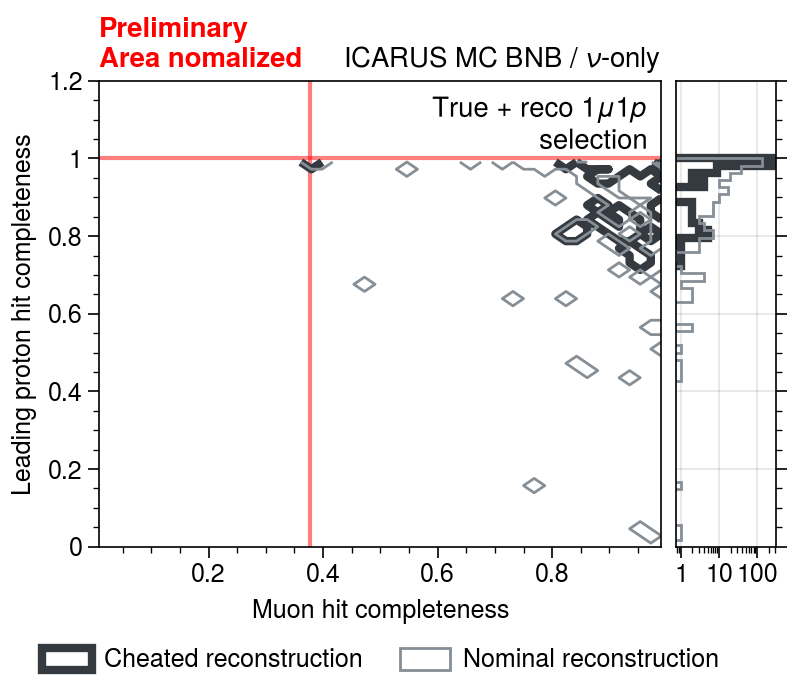

In [159]:
fig, ax = plot.subplots(
    width=4, height=3.5, ncols=1, nrows=1, 
    titlecolor='k', share=False, grid=False, sharey='labs',
    # ultitle=f'${cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (cheated)\n${nominal_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (non cheated)',
    # titlesize=9,
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    urtitle='True + reco $1\\mu1p$\nselection'
)

bin_completeness = np.linspace(0, 1, 55)
ax.set_title('Preliminary\nArea nomalized', color='r', loc='left', weight='bold')

cheated_dict = {
    'lw': 3,
    'color': 'gray8'
}

nominal_dict = {
    'lw': 1,
    'color': 'gray6'
}

for data, properties in zip([cheated_1u1p, nominal_1u1p], [cheated_dict, nominal_dict]):
    H, xe, ye = np.histogram2d(x=data.muon_completeness, y=data.leading_proton_completeness, bins=(bin_completeness, bin_completeness), density=True)
    ax.contour(xe, ye, H.T, **properties)

panel = ax.panel(side='r')

for data, properties, label in zip([cheated_1u1p, nominal_1u1p], [cheated_dict, nominal_dict], ['Cheated reconstruction', 'Nominal reconstruction']):
    panel.hist(data.leading_proton_completeness, bins=bin_completeness, **properties, label=label, fill=False, orientation='horizontal')

ax.format(xlabel='Muon hit completeness')
panel.format(ylabel=r'Leading proton hit completeness', xscale='log', ylim=(0, 1.2))

ax.format(xlabel='Muon hit completeness', ylim=(0,1.2))

ax.axvline(muon_4_completeness, color='r', alpha=0.5, zorder=1)
ax.axhline(cheated_1u1p[cheated_1u1p.muon_completeness == muon_4_completeness].leading_proton_completeness.values, color='r', alpha=0.5, zorder=1)

print(f'Bad µ in µ completeness = {muon_4_completeness:.4f}, p completeness = {cheated_1u1p[cheated_1u1p.muon_completeness == muon_4_completeness].leading_proton_completeness.values[0]:.4f}')

fig.legend(loc='b')
fig.savefig('muon_completeness_proton_completeness.pdf', bbox_inches='tight')

Bad µ in µ completeness = 0.3777, costheta_µp = 0.4621


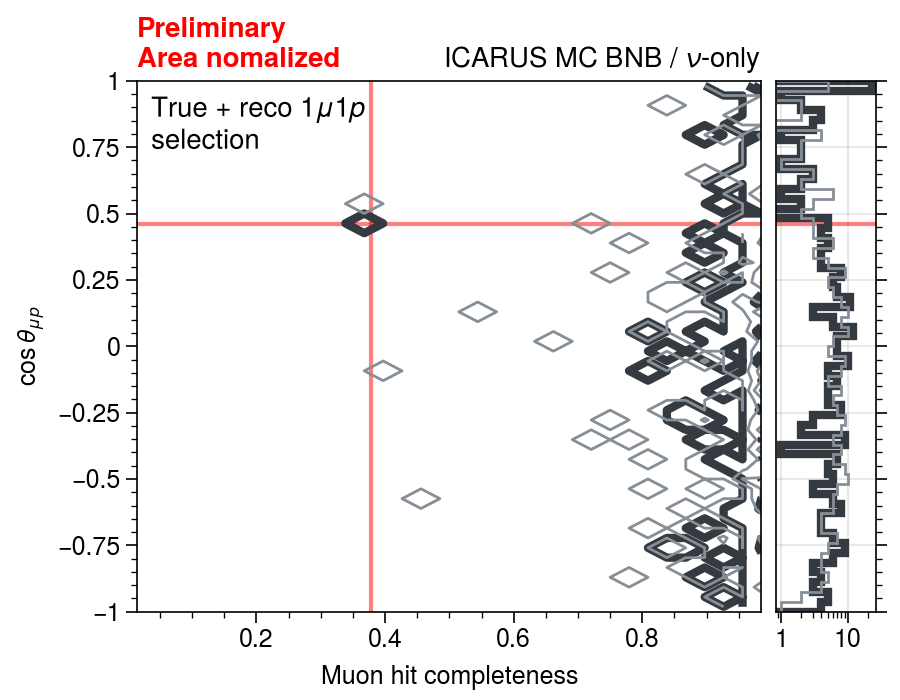

In [160]:
fig, ax = plot.subplots(
    width=4.5, height=3.5, ncols=1, nrows=1, 
    titlecolor='k', share=False, grid=False, sharey='labs',
    # ultitle=f'${cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (cheated)\n${nominal_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (non cheated)',
    # titlesize=9,
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    ultitle='True + reco $1\\mu1p$\nselection'
)

bin_completeness = np.linspace(0, 1, 35)
bin_CT3D = np.linspace(-1, 1, 55)
ax.set_title('Preliminary\nArea nomalized', color='r', loc='left', weight='bold')

cheated_dict = {
    'lw': 3,
    'color': 'gray8'
}

nominal_dict = {
    'lw': 1,
    'color': 'gray6'
}

for data, properties in zip([cheated_1u1p, nominal_1u1p], [cheated_dict, nominal_dict]):
    H, xe, ye = np.histogram2d(x=data.muon_completeness, y=data.CT3D_muon_leading_proton_from_rangeP, bins=(bin_completeness, bin_CT3D), density=True)
    ax.contour(xe, ye, H.T, **properties)

panel = ax.panel(side='r')

for data, properties, label in zip([cheated_1u1p, nominal_1u1p], [cheated_dict, nominal_dict], ['Cheated reconstruction', 'Nominal reconstruction']):
    panel.hist(data.CT3D_muon_leading_proton_from_rangeP, bins=bin_CT3D, **properties, label=label, fill=False, orientation='horizontal')

panel.format(ylabel=r'$\cos\theta_{\mu p}$', xscale='log', ylim=(-1,1))
ax.format(xlabel='Muon hit completeness', ylim=(-1,1))

ax.axvline(muon_4_completeness, color='r', alpha=0.5, zorder=1)
ax.axhline(cheated_1u1p[cheated_1u1p.muon_completeness == muon_4_completeness].CT3D_muon_leading_proton_from_rangeP.values, color='r', alpha=0.5, zorder=1)
panel.axhline(cheated_1u1p[cheated_1u1p.muon_completeness == muon_4_completeness].CT3D_muon_leading_proton_from_rangeP.values, color='r', alpha=0.5, zorder=1)

print(f'Bad µ in µ completeness = {muon_4_completeness:.4f}, costheta_µp = {cheated_1u1p[cheated_1u1p.muon_completeness == muon_4_completeness].CT3D_muon_leading_proton_from_rangeP.values[0]:.4f}')

fig.savefig('muon_completeness_costheta.pdf', bbox_inches='tight')


## Reco/true length for µ and p

Another good metric for the comparison of the reconstruction is given by the ratios of both reco/true lenght and reco/true momenta

/var/folders/rz/xbjc5djs43l2yfd7lq67www80000gn/T/ipykernel_89490/3840168718.py:13: UltraPlotWarning: Calling arbitrary axes methods from SubplotGrid was deprecated in v0.8 and will be removed in a future release. Please index the grid or loop over the grid instead.
  ax.set_title('Preliminary\nArea nomalized', color='r', loc='left', weight='bold')


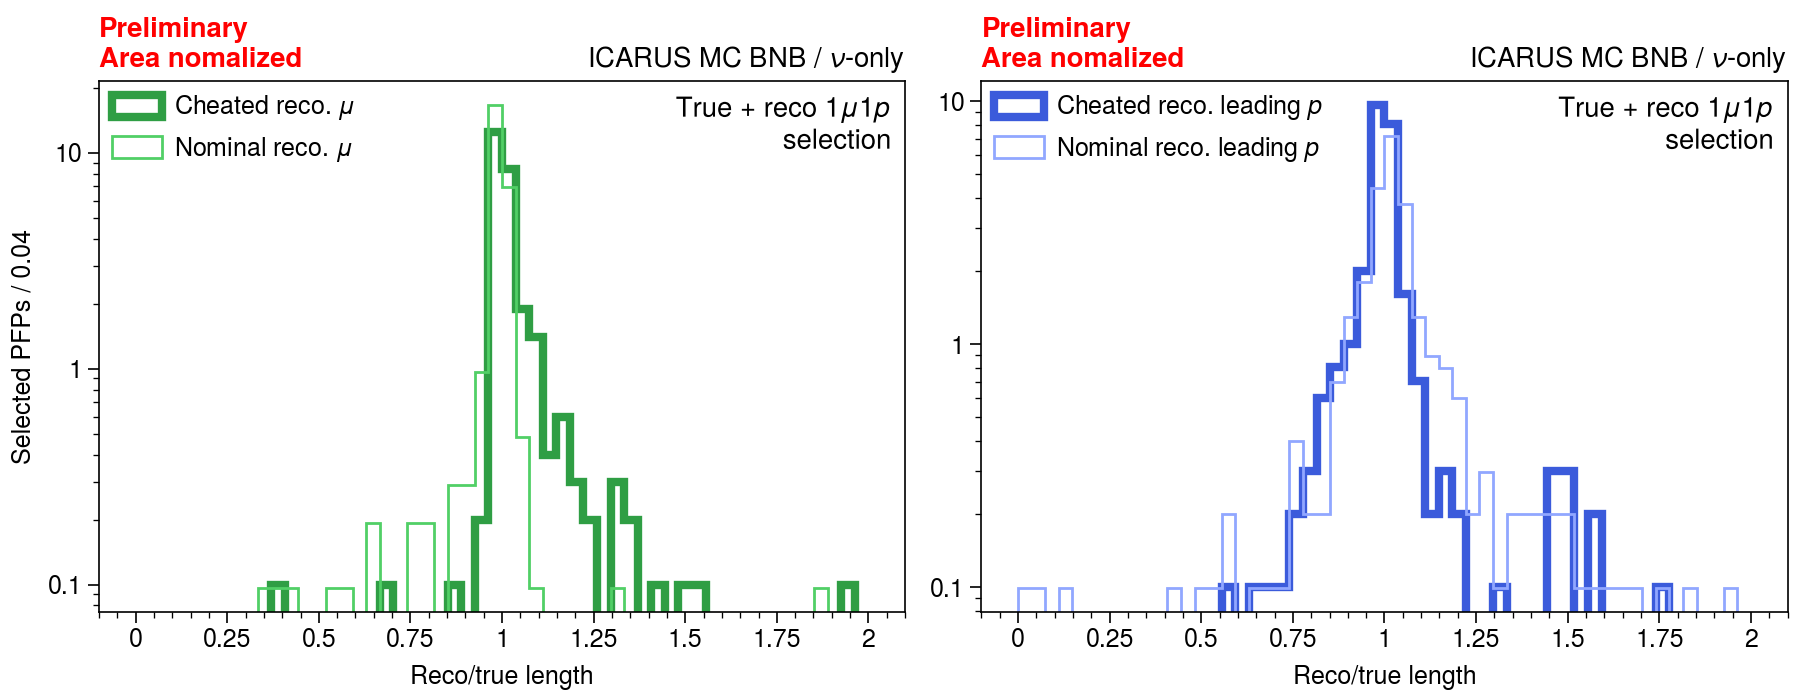

In [161]:
length_bin = np.linspace(0, 2, 55)

fig, ax = plot.subplots(
    width=9, height=3.5, ncols=2, nrows=1, 
    xlabel=r'Reco/true length', ylabel=f'Selected PFPs / {(length_bin.max()-length_bin.min())/len(length_bin):.2f}',  
    titlecolor='k', share=False, grid=False, sharey='labs',
    # ultitle=f'${cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (cheated)\n${nominal_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (non cheated)',
    # titlesize=9,
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    urtitle='True + reco $1\\mu1p$\nselection', yscale='log'
)

ax.set_title('Preliminary\nArea nomalized', color='r', loc='left', weight='bold')

cheating_dict = {
    'lw': 3,
    'fill': False,
}

un_cheating_dict = {
    'lw': 1,
    'fill': False,
}

cheating_color = {
    'leading_proton': 'indigo8',
    'muon': 'green8'
}

un_cheating_color = {
    'leading_proton': 'indigo3',
    'muon': 'green5'
}

particle_name = {
    'leading_proton': 'leading $p$',
    'muon': '$\\mu$'
}

for idx_p, particle in enumerate(['muon', 'leading_proton']):
    for data, properties, colormap, label in zip([cheated_1u1p, nominal_1u1p], [cheating_dict, un_cheating_dict], [cheating_color, un_cheating_color], ['Cheated', 'Nominal']):
        ax[idx_p].hist(data[f'{particle}_L_reco_true_ratio'], bins=length_bin, **properties, color=colormap[particle], label=f'{label} reco. {particle_name[particle]}', density=True)
        ax[idx_p].legend(loc='ul', ncols=1)

fig.savefig('L_reco_true_ratio.pdf', bbox_inches='tight')

/var/folders/rz/xbjc5djs43l2yfd7lq67www80000gn/T/ipykernel_89490/1990056182.py:13: UltraPlotWarning: Calling arbitrary axes methods from SubplotGrid was deprecated in v0.8 and will be removed in a future release. Please index the grid or loop over the grid instead.
  ax.set_title('Preliminary', color='r', loc='left', weight='bold')


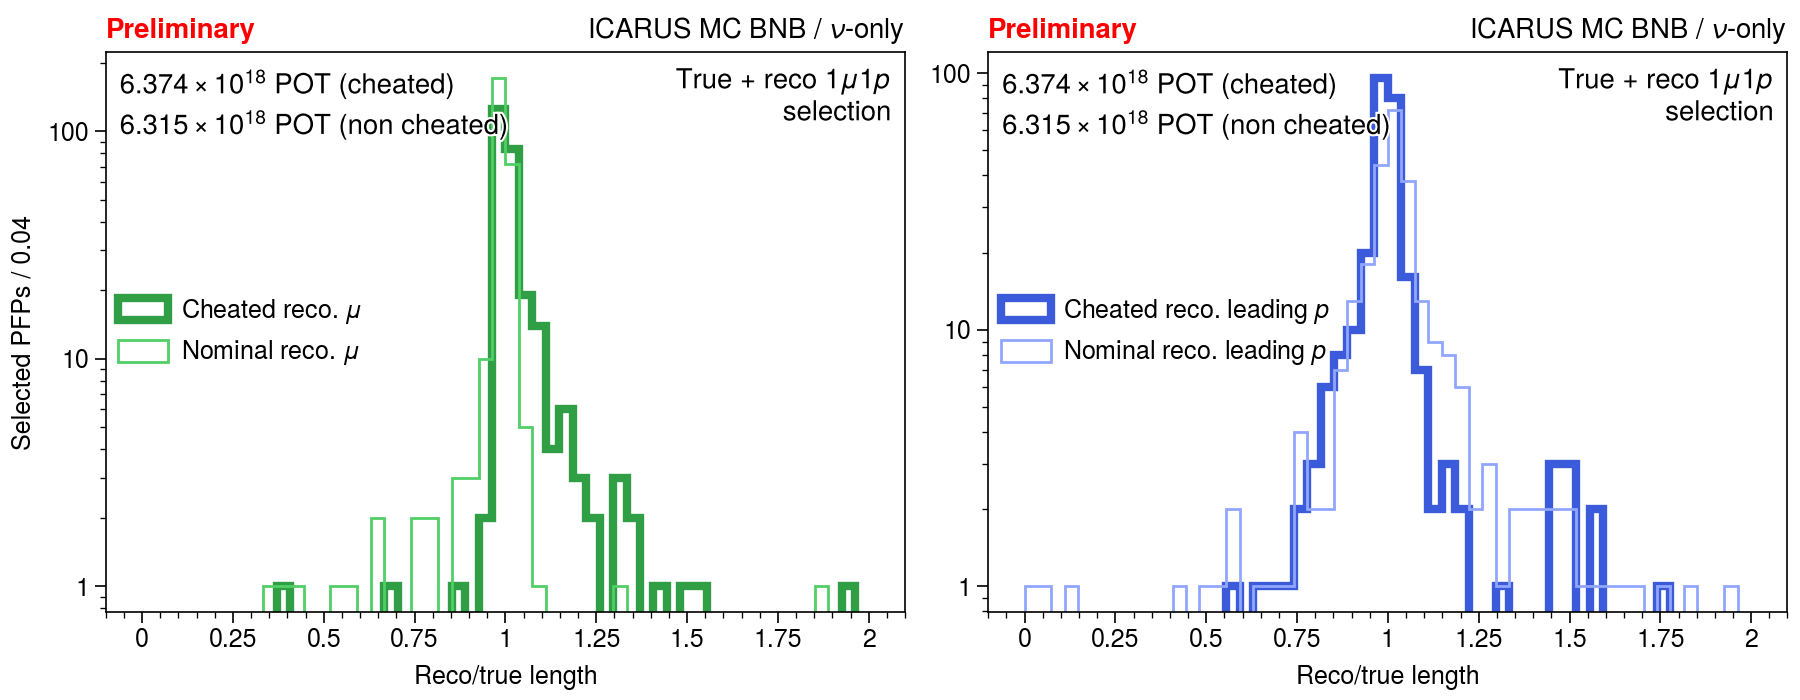

In [162]:
length_bin = np.linspace(0, 2, 55)

fig, ax = plot.subplots(
    width=9, height=3.5, ncols=2, nrows=1, 
    xlabel=r'Reco/true length', ylabel=f'Selected PFPs / {(length_bin.max()-length_bin.min())/len(length_bin):.2f}',  
    titlecolor='k', share=False, grid=False, sharey='labs',
    ultitle=f'${cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (cheated)\n${nominal_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (non cheated)',
    # titlesize=9,
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    urtitle='True + reco $1\\mu1p$\nselection', yscale='log'
)

ax.set_title('Preliminary', color='r', loc='left', weight='bold')

cheating_dict = {
    'lw': 3,
    'fill': False,
}

un_cheating_dict = {
    'lw': 1,
    'fill': False,
}

cheating_color = {
    'leading_proton': 'indigo8',
    'muon': 'green8'
}

un_cheating_color = {
    'leading_proton': 'indigo3',
    'muon': 'green5'
}

particle_name = {
    'leading_proton': 'leading $p$',
    'muon': '$\\mu$'
}

for idx_p, particle in enumerate(['muon', 'leading_proton']):
    for data, properties, colormap, label in zip([cheated_1u1p, nominal_1u1p], [cheating_dict, un_cheating_dict], [cheating_color, un_cheating_color], ['Cheated', 'Nominal']):
        ax[idx_p].hist(data[f'{particle}_L_reco_true_ratio'], bins=length_bin, **properties, color=colormap[particle], label=f'{label} reco. {particle_name[particle]}')
        ax[idx_p].legend(loc='cl', ncols=1)

fig.savefig('L_reco_true_ratio_not_normalized.pdf', bbox_inches='tight')

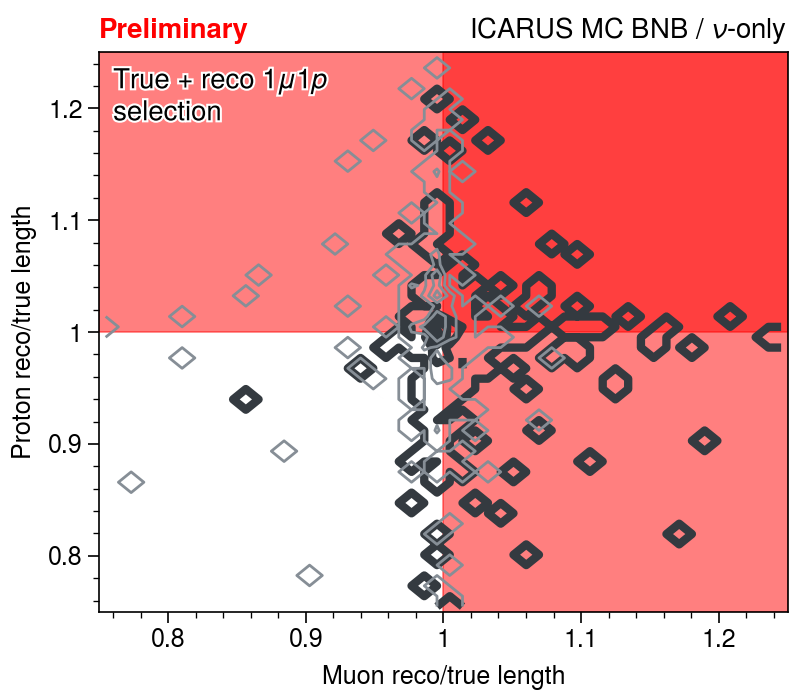

In [163]:
length_bin = np.linspace(0.75, 1.25, 55)

fig, ax = plot.subplots(
    width=4, height=3.5, ncols=1, nrows=1, 
    titlecolor='k', share=False, grid=False, sharey='labs',
    # titlesize=9,
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    ultitle='True + reco $1\\mu1p$\nselection'
)

bin_completeness = np.linspace(0, 1, 55)
ax.set_title('Preliminary', color='r', loc='left', weight='bold')

cheated_dict = {
    'lw': 3,
    'color': 'gray8'
}

nominal_dict = {
    'lw': 1,
    'color': 'gray6'
}

for data, properties in zip([cheated_1u1p, nominal_1u1p], [cheated_dict, nominal_dict]):
    H, xe, ye = np.histogram2d(x=data.muon_L_reco_true_ratio, y=data.leading_proton_L_reco_true_ratio, bins=(length_bin, length_bin))
    ax.contour(xe, ye, H.T, **properties)

ax.format(xlabel='Muon reco/true length', ylabel='Proton reco/true length', xlim=(length_bin.min(), length_bin.max()), ylim=(length_bin.min(), length_bin.max()))

# ax.axvline(1, color='r', alpha=0.5, zorder=1)
# ax.axhline(1, color='r', alpha=0.5, zorder=1)

ax.axvspan(1, 1.25, color='r', alpha=0.5, zorder=1)
ax.axhspan(1, 1.25, color='r', alpha=0.5, zorder=1)

# fig.legend(loc='b')
fig.savefig('L_reco_true_µp.pdf', bbox_inches='tight')

### Reco checks

Come per la completeness del muone abbiamo casi patologici
Possiamo studiarli andando a vedere se questi eventi hanno completeness o purity sballate, e capire cosa succede

Confronto con 
 - hit purity
 - hit completeness (e anche hit completeness dell'altra PFP nell'evento)
 - angolo tra µp

#### Reco/true length vs purity: µ 

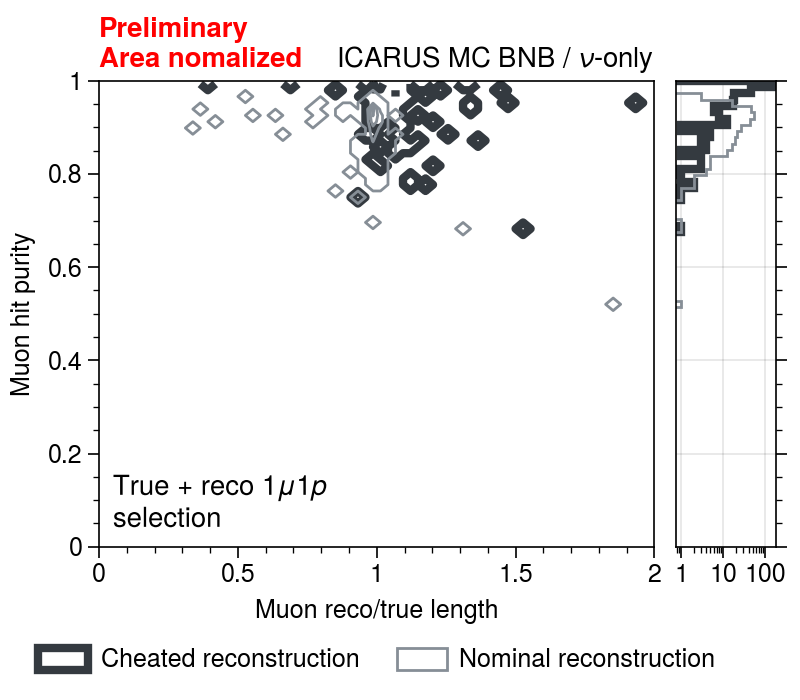

In [164]:
length_bin = np.linspace(0, 2, 75)
hit_binning = np.linspace(0, 1, 75)

fig, ax = plot.subplots(
    width=4, height=3.5, ncols=1, nrows=1, 
    titlecolor='k', share=False, grid=False, sharey='labs',
    # titlesize=9,
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    lltitle='True + reco $1\\mu1p$\nselection'
)

bin_completeness = np.linspace(0, 1, 55)
ax.set_title('Preliminary\nArea nomalized', color='r', loc='left', weight='bold')

cheated_dict = {
    'lw': 3,
    'color': 'gray8'
}

nominal_dict = {
    'lw': 1,
    'color': 'gray6'
}

for data, properties in zip([cheated_1u1p, nominal_1u1p], [cheated_dict, nominal_dict]):
    H, xe, ye = np.histogram2d(x=data.muon_L_reco_true_ratio, y=data.muon_purity, bins=(length_bin, hit_binning), density=True)
    ax.contour(xe, ye, H.T, **properties)

panel = ax.panel(side='r')

for data, properties, label in zip([cheated_1u1p, nominal_1u1p], [cheated_dict, nominal_dict], ['Cheated reconstruction', 'Nominal reconstruction']):
    panel.hist(data.muon_purity, bins=hit_binning, **properties, label=label, fill=False, orientation='horizontal')

panel.format(ylabel=r'Muon hit purity', xscale='log', ylim=(0, 1))

ax.format(xlabel='Muon reco/true length', ylim=(0,1), xlim=(0,2))

fig.legend(loc='b')
fig.savefig('muon_L_reco_true_ratio_µ_purity.pdf', bbox_inches='tight')

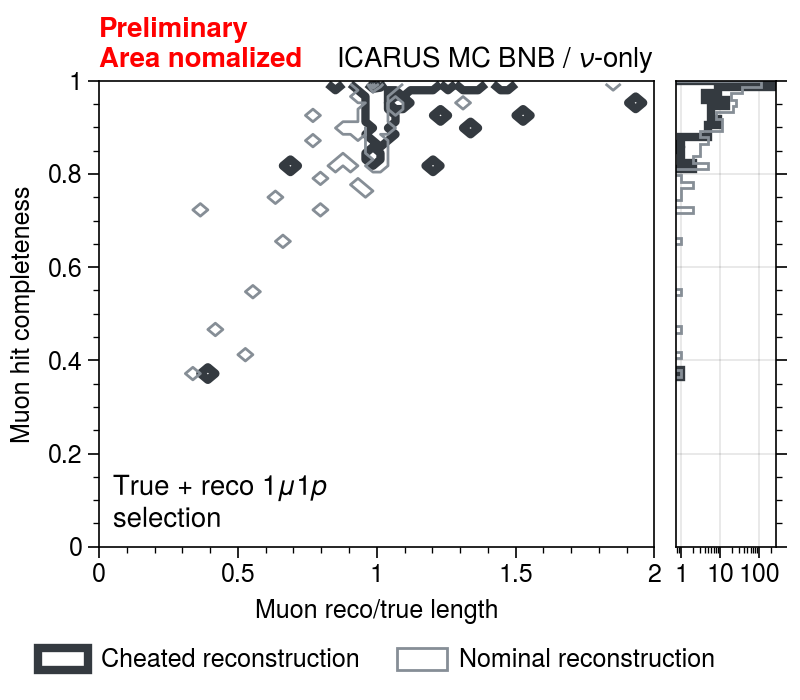

In [165]:
length_bin = np.linspace(0, 2, 75)
hit_binning = np.linspace(0, 1, 75)

fig, ax = plot.subplots(
    width=4, height=3.5, ncols=1, nrows=1, 
    titlecolor='k', share=False, grid=False, sharey='labs',
    # titlesize=9,
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    lltitle='True + reco $1\\mu1p$\nselection'
)

bin_completeness = np.linspace(0, 1, 55)
ax.set_title('Preliminary\nArea nomalized', color='r', loc='left', weight='bold')

cheated_dict = {
    'lw': 3,
    'color': 'gray8'
}

nominal_dict = {
    'lw': 1,
    'color': 'gray6'
}

for data, properties in zip([cheated_1u1p, nominal_1u1p], [cheated_dict, nominal_dict]):
    H, xe, ye = np.histogram2d(x=data.muon_L_reco_true_ratio, y=data.muon_completeness, bins=(length_bin, hit_binning), density=True)
    ax.contour(xe, ye, H.T, **properties)

panel = ax.panel(side='r')

for data, properties, label in zip([cheated_1u1p, nominal_1u1p], [cheated_dict, nominal_dict], ['Cheated reconstruction', 'Nominal reconstruction']):
    panel.hist(data.muon_completeness, bins=hit_binning, **properties, label=label, fill=False, orientation='horizontal')

panel.format(ylabel=r'Muon hit completeness', xscale='log', ylim=(0, 1))

ax.format(xlabel='Muon reco/true length', ylim=(0,1), xlim=(0,2))

fig.legend(loc='b')
fig.savefig('muon_L_reco_true_ratio_µ_completeness.pdf', bbox_inches='tight')

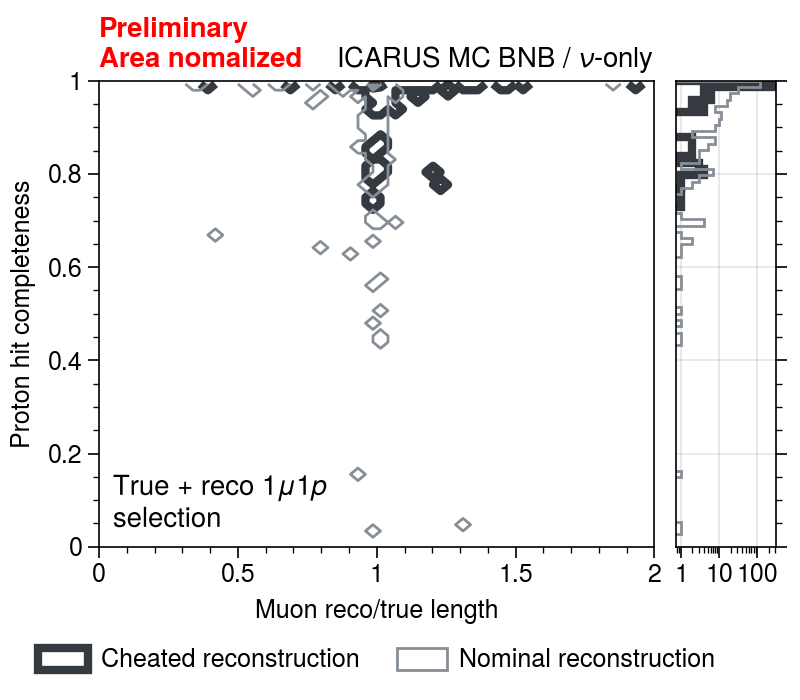

In [166]:
length_bin = np.linspace(0, 2, 75)
hit_binning = np.linspace(0, 1, 75)

fig, ax = plot.subplots(
    width=4, height=3.5, ncols=1, nrows=1, 
    titlecolor='k', share=False, grid=False, sharey='labs',
    # titlesize=9,
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    lltitle='True + reco $1\\mu1p$\nselection'
)

bin_completeness = np.linspace(0, 1, 55)
ax.set_title('Preliminary\nArea nomalized', color='r', loc='left', weight='bold')

cheated_dict = {
    'lw': 3,
    'color': 'gray8'
}

nominal_dict = {
    'lw': 1,
    'color': 'gray6'
}

for data, properties in zip([cheated_1u1p, nominal_1u1p], [cheated_dict, nominal_dict]):
    H, xe, ye = np.histogram2d(x=data.muon_L_reco_true_ratio, y=data.leading_proton_completeness, bins=(length_bin, hit_binning), density=True)
    ax.contour(xe, ye, H.T, **properties)

panel = ax.panel(side='r')

for data, properties, label in zip([cheated_1u1p, nominal_1u1p], [cheated_dict, nominal_dict], ['Cheated reconstruction', 'Nominal reconstruction']):
    panel.hist(data.leading_proton_completeness, bins=hit_binning, **properties, label=label, fill=False, orientation='horizontal')

panel.format(ylabel=r'Proton hit completeness', xscale='log', ylim=(0, 1))

ax.format(xlabel='Muon reco/true length', ylim=(0,1), xlim=(0,2))

fig.legend(loc='b')
fig.savefig('muon_L_reco_true_ratio_p_completeness.pdf', bbox_inches='tight')

#### Reco/true lenght vs costheta: µ

Maybe the particles are collinear?

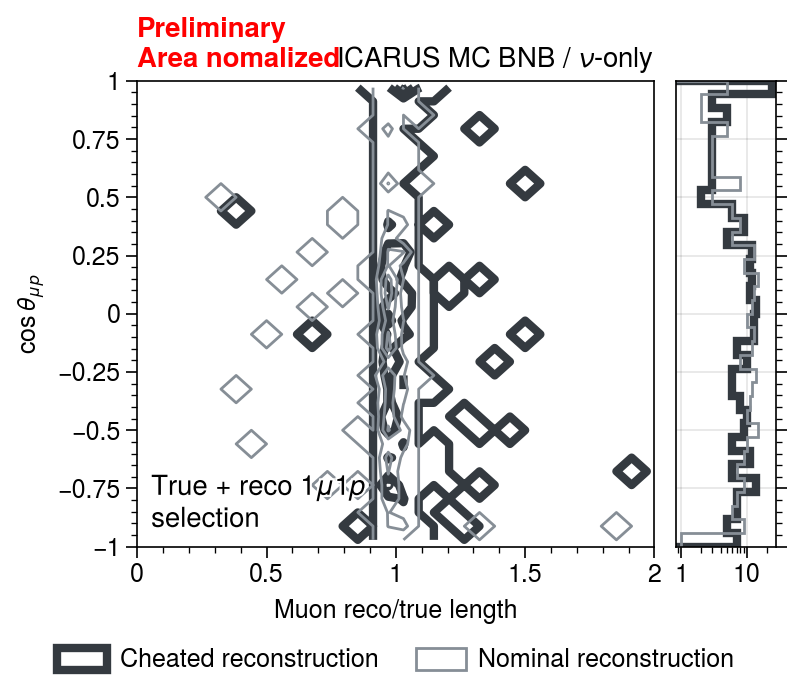

In [167]:
length_bin = np.linspace(0, 2, 35)
costh_binning = np.linspace(-1, 1, 35)

fig, ax = plot.subplots(
    width=4, height=3.5, ncols=1, nrows=1, 
    titlecolor='k', share=False, grid=False, sharey='labs',
    # titlesize=9,
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    lltitle='True + reco $1\\mu1p$\nselection'
)

bin_completeness = np.linspace(0, 1, 55)
ax.set_title('Preliminary\nArea nomalized', color='r', loc='left', weight='bold')

cheated_dict = {
    'lw': 3,
    'color': 'gray8'
}

nominal_dict = {
    'lw': 1,
    'color': 'gray6'
}

for data, properties in zip([cheated_1u1p, nominal_1u1p], [cheated_dict, nominal_dict]):
    H, xe, ye = np.histogram2d(x=data.muon_L_reco_true_ratio, y=data.CT3D_muon_leading_proton_from_rangeP, bins=(length_bin, costh_binning), density=True)
    ax.contour(xe, ye, H.T, **properties)

panel = ax.panel(side='r')

for data, properties, label in zip([cheated_1u1p, nominal_1u1p], [cheated_dict, nominal_dict], ['Cheated reconstruction', 'Nominal reconstruction']):
    panel.hist(data.CT3D_muon_leading_proton_from_rangeP, bins=costh_binning, **properties, label=label, fill=False, orientation='horizontal')

panel.format(ylabel=r'$\cos\theta_{\mu p}$', xscale='log', ylim=(-1, 1))

ax.format(xlabel='Muon reco/true length', ylim=(-1,1), xlim=(0,2))

fig.legend(loc='b')
fig.savefig('muon_L_reco_true_ratio_costheta.pdf', bbox_inches='tight')

#### Reco/true length vs R: µ

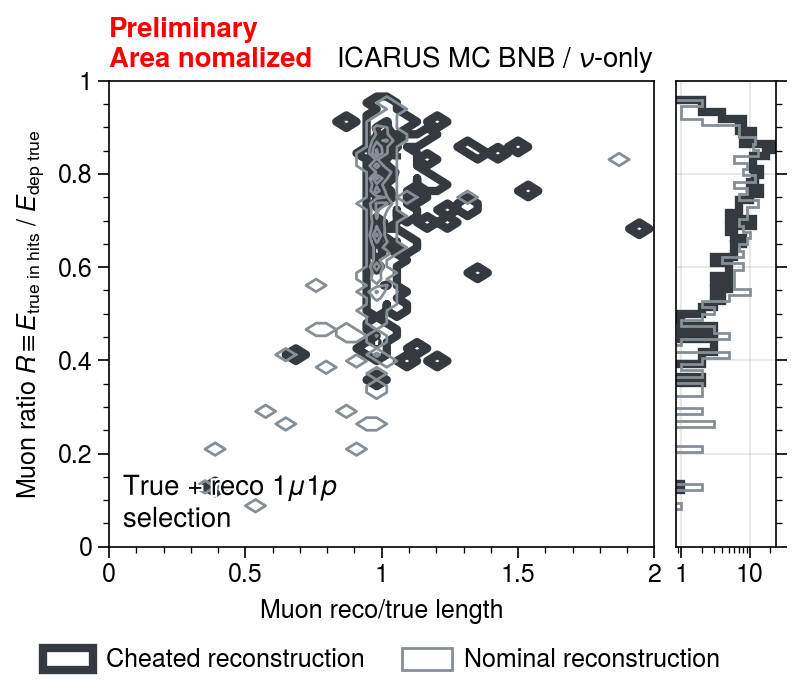

In [168]:
length_bin = np.linspace(0, 2, 55)
R_binning = np.linspace(0, 1, 75)

fig, ax = plot.subplots(
    width=4, height=3.5, ncols=1, nrows=1, 
    titlecolor='k', share=False, grid=False, sharey='labs',
    # titlesize=9,
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    lltitle='True + reco $1\\mu1p$\nselection'
)

bin_completeness = np.linspace(0, 1, 55)
ax.set_title('Preliminary\nArea nomalized', color='r', loc='left', weight='bold')

cheated_dict = {
    'lw': 3,
    'color': 'gray8'
}

nominal_dict = {
    'lw': 1,
    'color': 'gray6'
}

for data, properties in zip([cheated_1u1p, nominal_1u1p], [cheated_dict, nominal_dict]):
    H, xe, ye = np.histogram2d(x=data.muon_L_reco_true_ratio, y=data.muon_R, bins=(length_bin, R_binning), density=True)
    ax.contour(xe, ye, H.T, **properties)

panel = ax.panel(side='r')

for data, properties, label in zip([cheated_1u1p, nominal_1u1p], [cheated_dict, nominal_dict], ['Cheated reconstruction', 'Nominal reconstruction']):
    panel.hist(data.muon_R, bins=R_binning, **properties, label=label, fill=False, orientation='horizontal')

panel.format(ylabel=r'Muon ratio $R \equiv E_\text{true in hits}\ /\ E_\text{dep true}$', xscale='log', ylim=(0, 1))

ax.format(xlabel='Muon reco/true length', ylim=(0,1), xlim=(0,2))

fig.legend(loc='b')
fig.savefig('muon_L_reco_true_ratio_µ_R.pdf', bbox_inches='tight')

#### Reco/true length vs purity: p

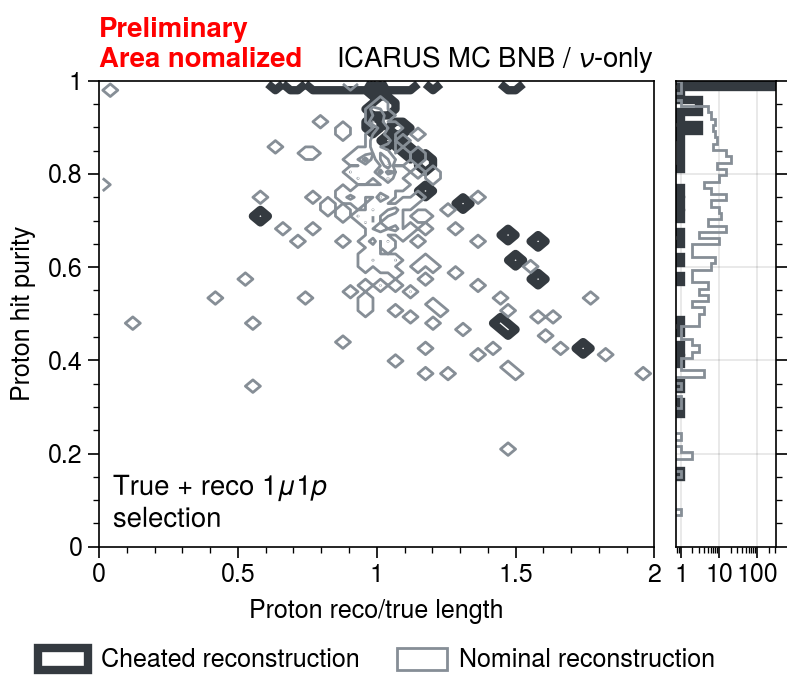

In [169]:
length_bin = np.linspace(0, 2, 75)
hit_binning = np.linspace(0, 1, 75)

fig, ax = plot.subplots(
    width=4, height=3.5, ncols=1, nrows=1, 
    titlecolor='k', share=False, grid=False, sharey='labs',
    # titlesize=9,
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    lltitle='True + reco $1\\mu1p$\nselection'
)

bin_completeness = np.linspace(0, 1, 55)
ax.set_title('Preliminary\nArea nomalized', color='r', loc='left', weight='bold')

cheated_dict = {
    'lw': 3,
    'color': 'gray8'
}

nominal_dict = {
    'lw': 1,
    'color': 'gray6'
}

for data, properties in zip([cheated_1u1p, nominal_1u1p], [cheated_dict, nominal_dict]):
    H, xe, ye = np.histogram2d(x=data.leading_proton_L_reco_true_ratio, y=data.leading_proton_purity, bins=(length_bin, hit_binning), density=True)
    ax.contour(xe, ye, H.T, **properties)

panel = ax.panel(side='r')

for data, properties, label in zip([cheated_1u1p, nominal_1u1p], [cheated_dict, nominal_dict], ['Cheated reconstruction', 'Nominal reconstruction']):
    panel.hist(data.leading_proton_purity, bins=hit_binning, **properties, label=label, fill=False, orientation='horizontal')

panel.format(ylabel=r'Proton hit purity', xscale='log', ylim=(0, 1))

ax.format(xlabel='Proton reco/true length', ylim=(0,1), xlim=(0,2))

fig.legend(loc='b')
fig.savefig('proton_L_reco_true_ratio_µ_purity.pdf', bbox_inches='tight')

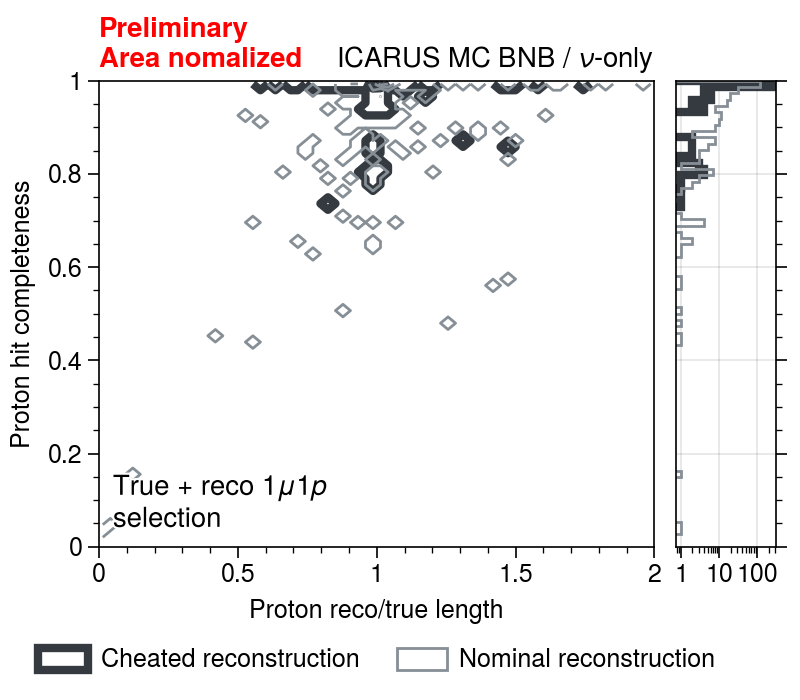

In [170]:
length_bin = np.linspace(0, 2, 75)
hit_binning = np.linspace(0, 1, 75)

fig, ax = plot.subplots(
    width=4, height=3.5, ncols=1, nrows=1, 
    titlecolor='k', share=False, grid=False, sharey='labs',
    # titlesize=9,
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    lltitle='True + reco $1\\mu1p$\nselection'
)

bin_completeness = np.linspace(0, 1, 55)
ax.set_title('Preliminary\nArea nomalized', color='r', loc='left', weight='bold')

cheated_dict = {
    'lw': 3,
    'color': 'gray8'
}

nominal_dict = {
    'lw': 1,
    'color': 'gray6'
}

for data, properties in zip([cheated_1u1p, nominal_1u1p], [cheated_dict, nominal_dict]):
    H, xe, ye = np.histogram2d(x=data.leading_proton_L_reco_true_ratio, y=data.leading_proton_completeness, bins=(length_bin, hit_binning), density=True)
    ax.contour(xe, ye, H.T, **properties)

panel = ax.panel(side='r')

for data, properties, label in zip([cheated_1u1p, nominal_1u1p], [cheated_dict, nominal_dict], ['Cheated reconstruction', 'Nominal reconstruction']):
    panel.hist(data.leading_proton_completeness, bins=hit_binning, **properties, label=label, fill=False, orientation='horizontal')

panel.format(ylabel=r'Proton hit completeness', xscale='log', ylim=(0, 1))

ax.format(xlabel='Proton reco/true length', ylim=(0,1), xlim=(0,2))

fig.legend(loc='b')
fig.savefig('proton_L_reco_true_ratio_µ_completeness.pdf', bbox_inches='tight')

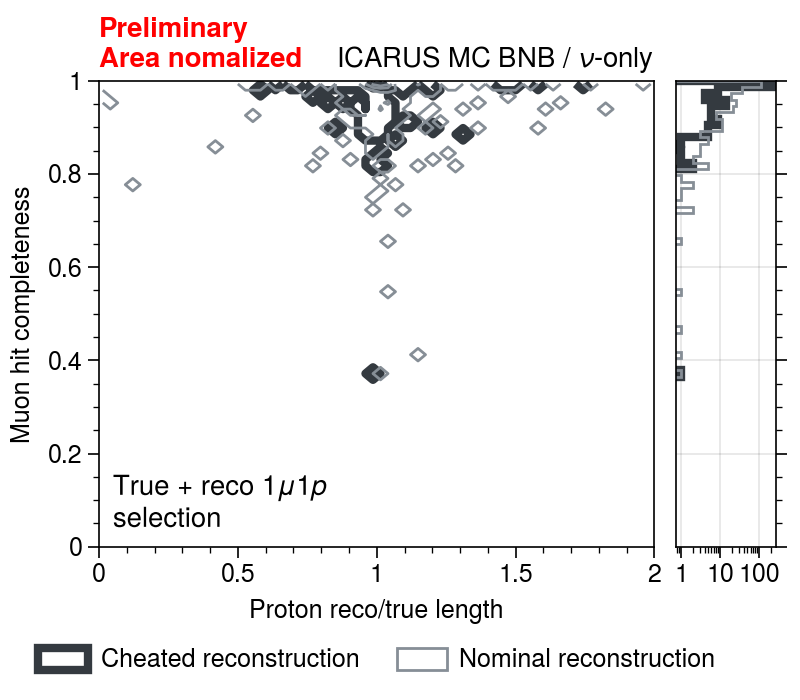

In [171]:
length_bin = np.linspace(0, 2, 75)
hit_binning = np.linspace(0, 1, 75)

fig, ax = plot.subplots(
    width=4, height=3.5, ncols=1, nrows=1, 
    titlecolor='k', share=False, grid=False, sharey='labs',
    # titlesize=9,
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    lltitle='True + reco $1\\mu1p$\nselection'
)

bin_completeness = np.linspace(0, 1, 55)
ax.set_title('Preliminary\nArea nomalized', color='r', loc='left', weight='bold')

cheated_dict = {
    'lw': 3,
    'color': 'gray8'
}

nominal_dict = {
    'lw': 1,
    'color': 'gray6'
}

for data, properties in zip([cheated_1u1p, nominal_1u1p], [cheated_dict, nominal_dict]):
    H, xe, ye = np.histogram2d(x=data.leading_proton_L_reco_true_ratio, y=data.muon_completeness, bins=(length_bin, hit_binning), density=True)
    ax.contour(xe, ye, H.T, **properties)

panel = ax.panel(side='r')

for data, properties, label in zip([cheated_1u1p, nominal_1u1p], [cheated_dict, nominal_dict], ['Cheated reconstruction', 'Nominal reconstruction']):
    panel.hist(data.muon_completeness, bins=hit_binning, **properties, label=label, fill=False, orientation='horizontal')

panel.format(ylabel=r'Muon hit completeness', xscale='log', ylim=(0, 1))

ax.format(xlabel='Proton reco/true length', ylim=(0,1), xlim=(0,2))

fig.legend(loc='b')
fig.savefig('proton_L_reco_true_ratio_p_completeness.pdf', bbox_inches='tight')

#### Reco/true lenght vs costheta: p

Maybe the particles are collinear?

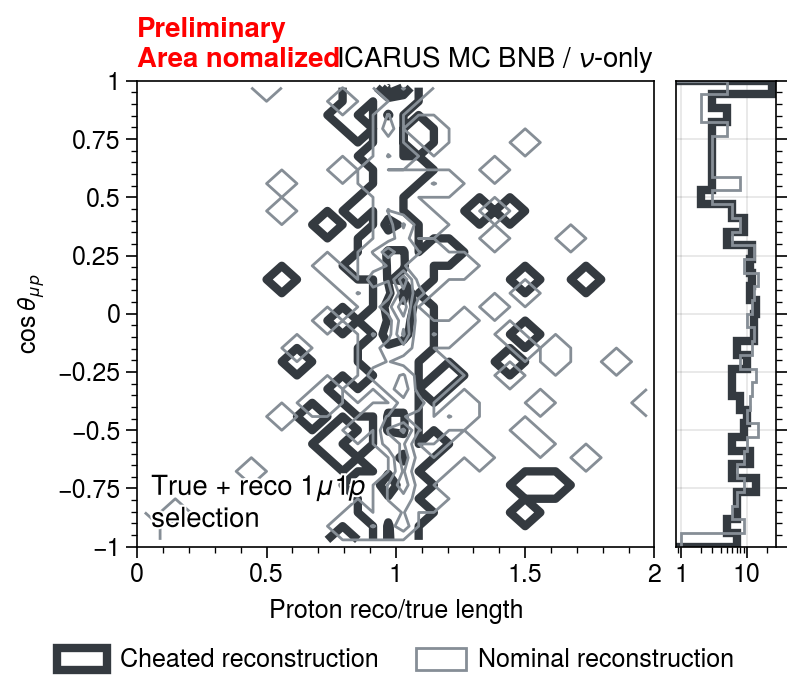

In [172]:
length_bin = np.linspace(0, 2, 35)
costh_binning = np.linspace(-1, 1, 35)

fig, ax = plot.subplots(
    width=4, height=3.5, ncols=1, nrows=1, 
    titlecolor='k', share=False, grid=False, sharey='labs',
    # titlesize=9,
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    lltitle='True + reco $1\\mu1p$\nselection'
)

bin_completeness = np.linspace(0, 1, 55)
ax.set_title('Preliminary\nArea nomalized', color='r', loc='left', weight='bold')

cheated_dict = {
    'lw': 3,
    'color': 'gray8'
}

nominal_dict = {
    'lw': 1,
    'color': 'gray6'
}

for data, properties in zip([cheated_1u1p, nominal_1u1p], [cheated_dict, nominal_dict]):
    H, xe, ye = np.histogram2d(x=data.leading_proton_L_reco_true_ratio, y=data.CT3D_muon_leading_proton_from_rangeP, bins=(length_bin, costh_binning), density=True)
    ax.contour(xe, ye, H.T, **properties)

panel = ax.panel(side='r')

for data, properties, label in zip([cheated_1u1p, nominal_1u1p], [cheated_dict, nominal_dict], ['Cheated reconstruction', 'Nominal reconstruction']):
    panel.hist(data.CT3D_muon_leading_proton_from_rangeP, bins=costh_binning, **properties, label=label, fill=False, orientation='horizontal')

panel.format(ylabel=r'$\cos\theta_{\mu p}$', xscale='log', ylim=(-1, 1))

ax.format(xlabel='Proton reco/true length', ylim=(-1,1), xlim=(0,2))

fig.legend(loc='b')
fig.savefig('proton_L_reco_true_ratio_costheta.pdf', bbox_inches='tight')

#### Reco/true length vs R: p

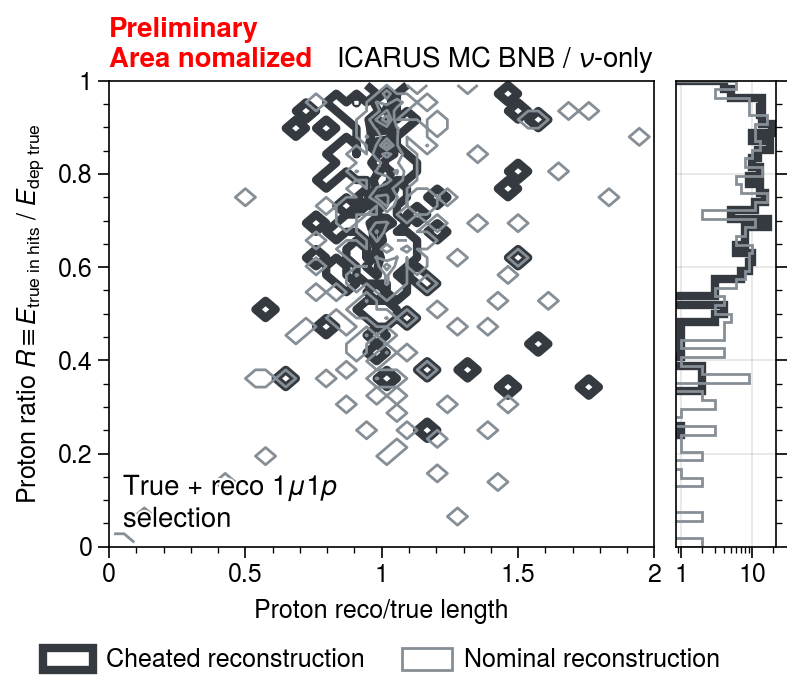

In [173]:
length_bin = np.linspace(0, 2, 55)
R_binning = np.linspace(0, 1, 55)

fig, ax = plot.subplots(
    width=4, height=3.5, ncols=1, nrows=1, 
    titlecolor='k', share=False, grid=False, sharey='labs',
    # titlesize=9,
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    lltitle='True + reco $1\\mu1p$\nselection'
)

bin_completeness = np.linspace(0, 1, 55)
ax.set_title('Preliminary\nArea nomalized', color='r', loc='left', weight='bold')

cheated_dict = {
    'lw': 3,
    'color': 'gray8'
}

nominal_dict = {
    'lw': 1,
    'color': 'gray6'
}

for data, properties in zip([cheated_1u1p, nominal_1u1p], [cheated_dict, nominal_dict]):
    H, xe, ye = np.histogram2d(x=data.leading_proton_L_reco_true_ratio, y=data.leading_proton_R, bins=(length_bin, R_binning), density=True)
    ax.contour(xe, ye, H.T, **properties)

panel = ax.panel(side='r')

for data, properties, label in zip([cheated_1u1p, nominal_1u1p], [cheated_dict, nominal_dict], ['Cheated reconstruction', 'Nominal reconstruction']):
    panel.hist(data.leading_proton_R, bins=R_binning, **properties, label=label, fill=False, orientation='horizontal')

panel.format(ylabel=r'Proton ratio $R \equiv E_\text{true in hits}\ /\ E_\text{dep true}$', xscale='log', ylim=(0, 1))

ax.format(xlabel='Proton reco/true length', ylim=(0,1), xlim=(0,2))

fig.legend(loc='b')
fig.savefig('proton_L_reco_true_ratio_p_R.pdf', bbox_inches='tight')

## Reco/true momentum for µ and p

/var/folders/rz/xbjc5djs43l2yfd7lq67www80000gn/T/ipykernel_89490/2253298245.py:13: UltraPlotWarning: Calling arbitrary axes methods from SubplotGrid was deprecated in v0.8 and will be removed in a future release. Please index the grid or loop over the grid instead.
  ax.set_title('Preliminary\nArea nomalized', color='r', loc='left', weight='bold')


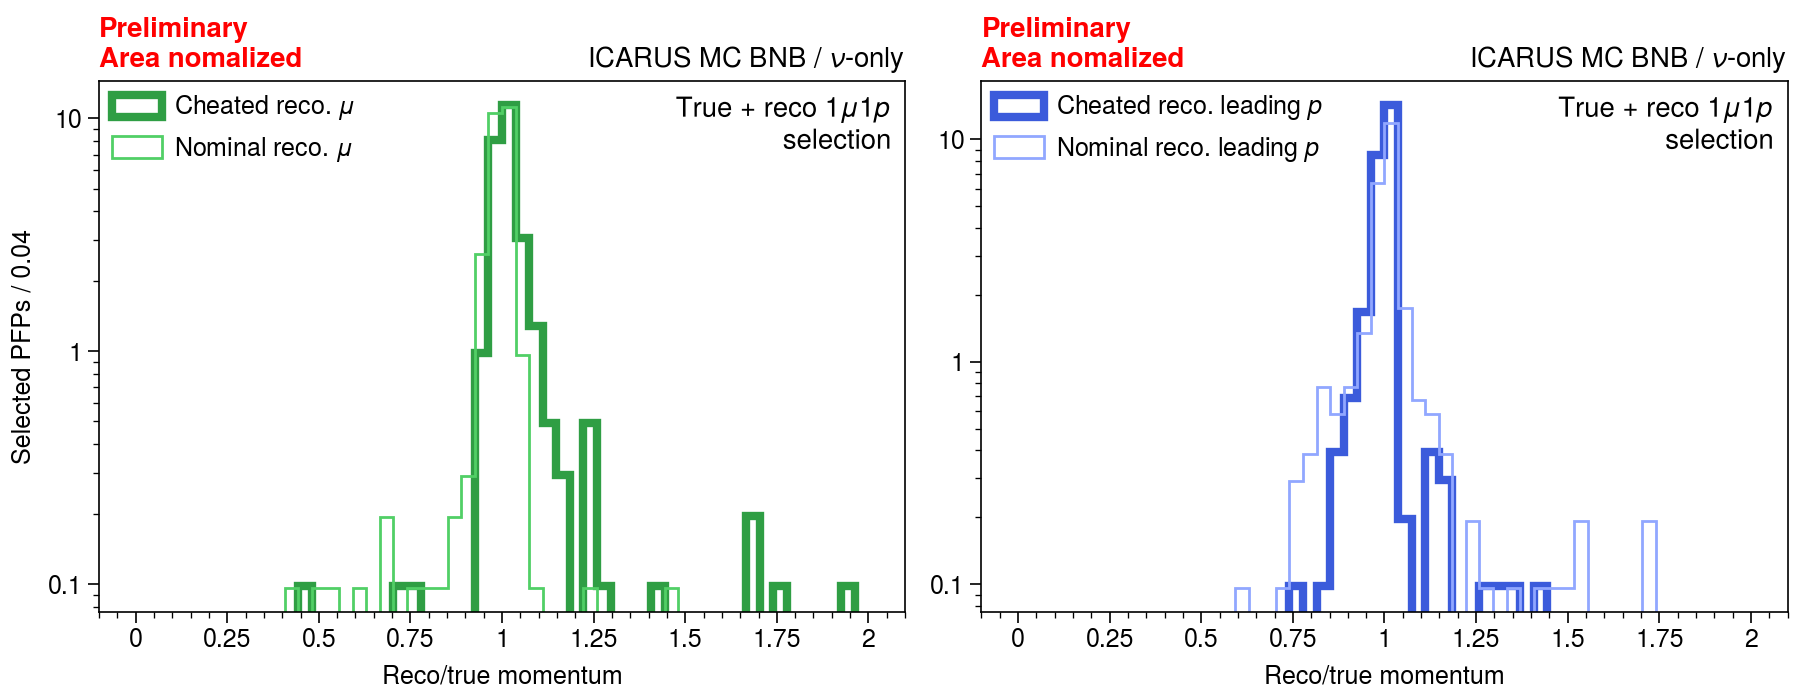

In [174]:
P_bin = np.linspace(0, 2, 55)

fig, ax = plot.subplots(
    width=9, height=3.5, ncols=2, nrows=1, 
    xlabel=r'Reco/true momentum', ylabel=f'Selected PFPs / {(P_bin.max()-P_bin.min())/len(P_bin):.2f}',  
    titlecolor='k', share=False, grid=False, sharey='labs',
    # ultitle=f'${cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (cheated)\n${nominal_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (non cheated)',
    # titlesize=9,
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    urtitle='True + reco $1\\mu1p$\nselection', yscale='log'
)

ax.set_title('Preliminary\nArea nomalized', color='r', loc='left', weight='bold')

cheating_dict = {
    'lw': 3,
    'fill': False,
}

un_cheating_dict = {
    'lw': 1,
    'fill': False,
}

cheating_color = {
    'leading_proton': 'indigo8',
    'muon': 'green8'
}

un_cheating_color = {
    'leading_proton': 'indigo3',
    'muon': 'green5'
}

particle_name = {
    'leading_proton': 'leading $p$',
    'muon': '$\\mu$'
}

for idx_p, particle in enumerate(['muon', 'leading_proton']):
    for data, properties, colormap, label in zip([cheated_1u1p, nominal_1u1p], [cheating_dict, un_cheating_dict], [cheating_color, un_cheating_color], ['Cheated', 'Nominal']):
        ax[idx_p].hist(data[f'{particle}_P_reco_true_ratio'], bins=P_bin, **properties, color=colormap[particle], label=f'{label} reco. {particle_name[particle]}', density=True)
        ax[idx_p].legend(loc='ul', ncols=1)

fig.savefig('P_reco_true_ratio.pdf', bbox_inches='tight')

/var/folders/rz/xbjc5djs43l2yfd7lq67www80000gn/T/ipykernel_89490/3947131611.py:13: UltraPlotWarning: Calling arbitrary axes methods from SubplotGrid was deprecated in v0.8 and will be removed in a future release. Please index the grid or loop over the grid instead.
  ax.set_title('Preliminary', color='r', loc='left', weight='bold')


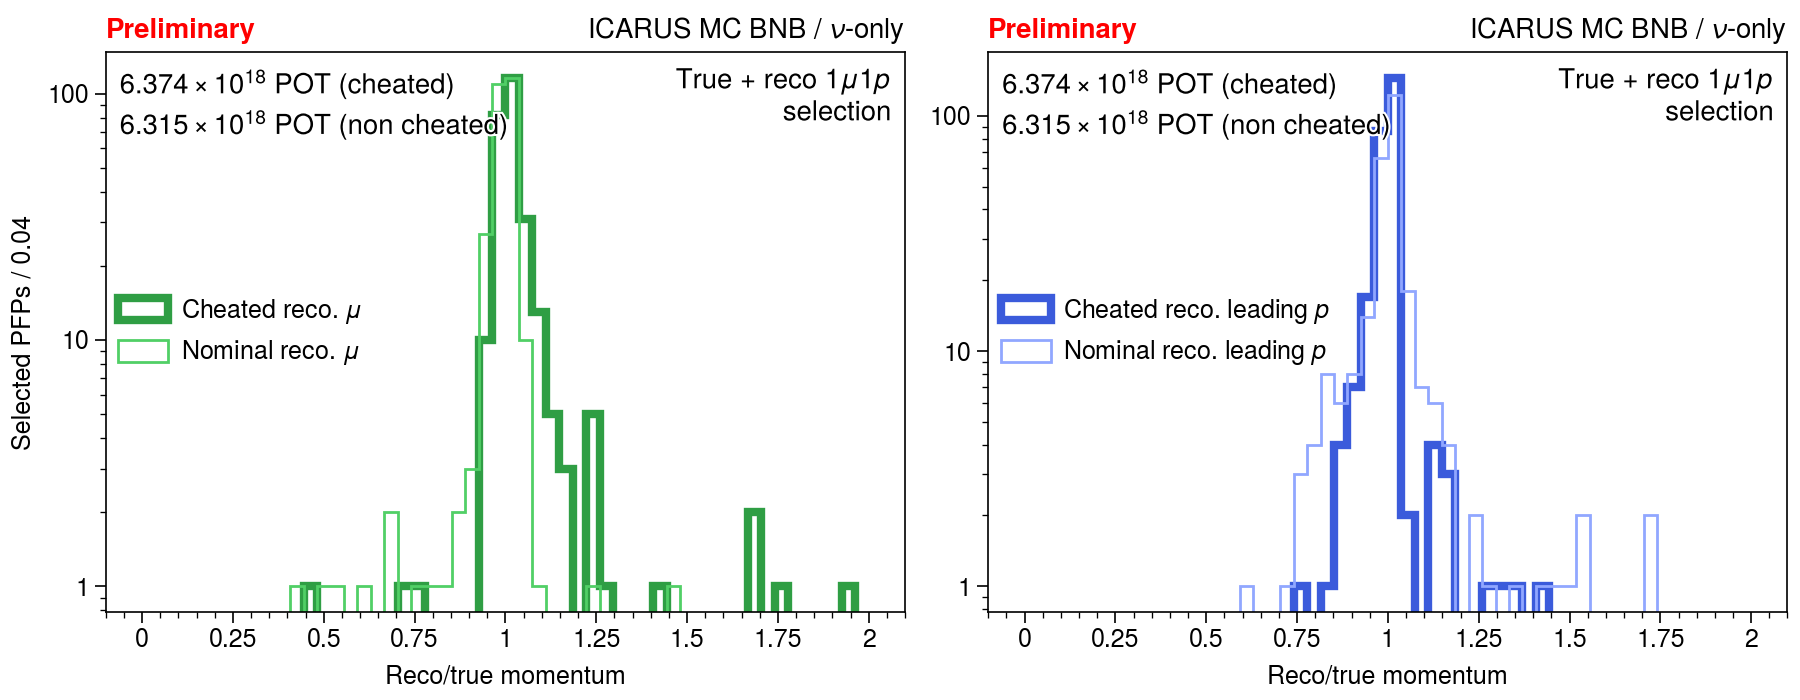

In [175]:
P_bin = np.linspace(0, 2, 55)

fig, ax = plot.subplots(
    width=9, height=3.5, ncols=2, nrows=1, 
    xlabel=r'Reco/true momentum', ylabel=f'Selected PFPs / {(P_bin.max()-P_bin.min())/len(P_bin):.2f}',  
    titlecolor='k', share=False, grid=False, sharey='labs',
    ultitle=f'${cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (cheated)\n${nominal_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (non cheated)',
    # titlesize=9,
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    urtitle='True + reco $1\\mu1p$\nselection', yscale='log'
)

ax.set_title('Preliminary', color='r', loc='left', weight='bold')

cheating_dict = {
    'lw': 3,
    'fill': False,
}

un_cheating_dict = {
    'lw': 1,
    'fill': False,
}

cheating_color = {
    'leading_proton': 'indigo8',
    'muon': 'green8'
}

un_cheating_color = {
    'leading_proton': 'indigo3',
    'muon': 'green5'
}

particle_name = {
    'leading_proton': 'leading $p$',
    'muon': '$\\mu$'
}

for idx_p, particle in enumerate(['muon', 'leading_proton']):
    for data, properties, colormap, label in zip([cheated_1u1p, nominal_1u1p], [cheating_dict, un_cheating_dict], [cheating_color, un_cheating_color], ['Cheated', 'Nominal']):
        ax[idx_p].hist(data[f'{particle}_P_reco_true_ratio'], bins=P_bin, **properties, color=colormap[particle], label=f'{label} reco. {particle_name[particle]}')
        ax[idx_p].legend(loc='cl', ncols=1)

fig.savefig('P_reco_true_ratio_non_normalized.pdf', bbox_inches='tight')

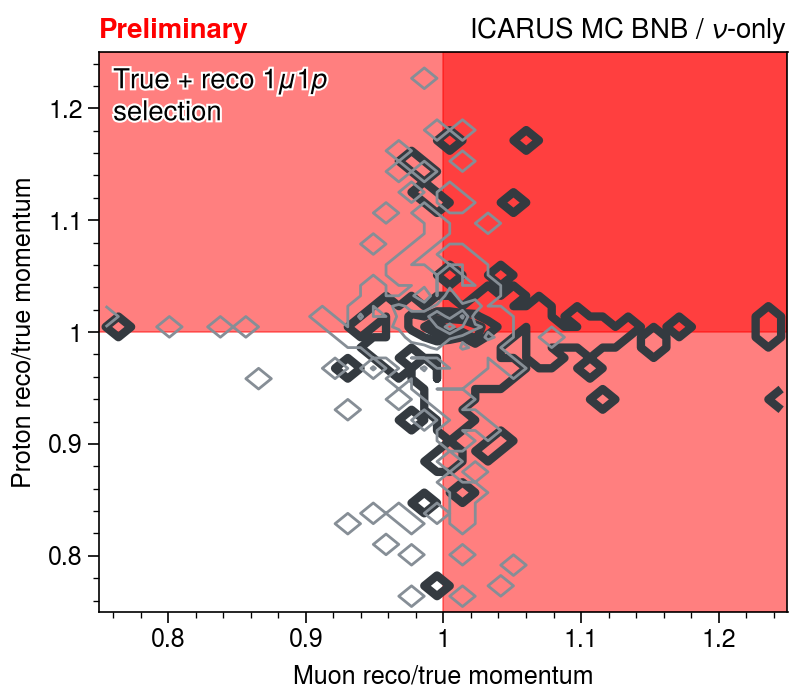

In [176]:
length_bin = np.linspace(0.75, 1.25, 55)

fig, ax = plot.subplots(
    width=4, height=3.5, ncols=1, nrows=1, 
    titlecolor='k', share=False, grid=False, sharey='labs',
    # titlesize=9,
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    ultitle='True + reco $1\\mu1p$\nselection'
)

bin_completeness = np.linspace(0, 1, 55)
ax.set_title('Preliminary', color='r', loc='left', weight='bold')

cheated_dict = {
    'lw': 3,
    'color': 'gray8'
}

nominal_dict = {
    'lw': 1,
    'color': 'gray6'
}

for data, properties in zip([cheated_1u1p, nominal_1u1p], [cheated_dict, nominal_dict]):
    H, xe, ye = np.histogram2d(x=data.muon_P_reco_true_ratio, y=data.leading_proton_P_reco_true_ratio, bins=(length_bin, length_bin))
    ax.contour(xe, ye, H.T, **properties)

ax.format(xlabel='Muon reco/true momentum', ylabel='Proton reco/true momentum', xlim=(length_bin.min(), length_bin.max()), ylim=(length_bin.min(), length_bin.max()))

# ax.axvline(1, color='r', alpha=0.5, zorder=1)
# ax.axhline(1, color='r', alpha=0.5, zorder=1)

ax.axvspan(1, 1.25, color='r', alpha=0.5, zorder=1)
ax.axhspan(1, 1.25, color='r', alpha=0.5, zorder=1)

# fig.legend(loc='b')
fig.savefig('P_reco_true_µp.pdf', bbox_inches='tight')

## Angle checks

/var/folders/rz/xbjc5djs43l2yfd7lq67www80000gn/T/ipykernel_89490/3502488591.py:13: UltraPlotWarning: Calling arbitrary axes methods from SubplotGrid was deprecated in v0.8 and will be removed in a future release. Please index the grid or loop over the grid instead.
  ax.set_title('Preliminary', color='r', loc='left', weight='bold')
/var/folders/rz/xbjc5djs43l2yfd7lq67www80000gn/T/ipykernel_89490/3502488591.py:38: UltraPlotWarning: Calling arbitrary axes methods from SubplotGrid was deprecated in v0.8 and will be removed in a future release. Please index the grid or loop over the grid instead.
  ax.legend(loc='ur', ncols=1)


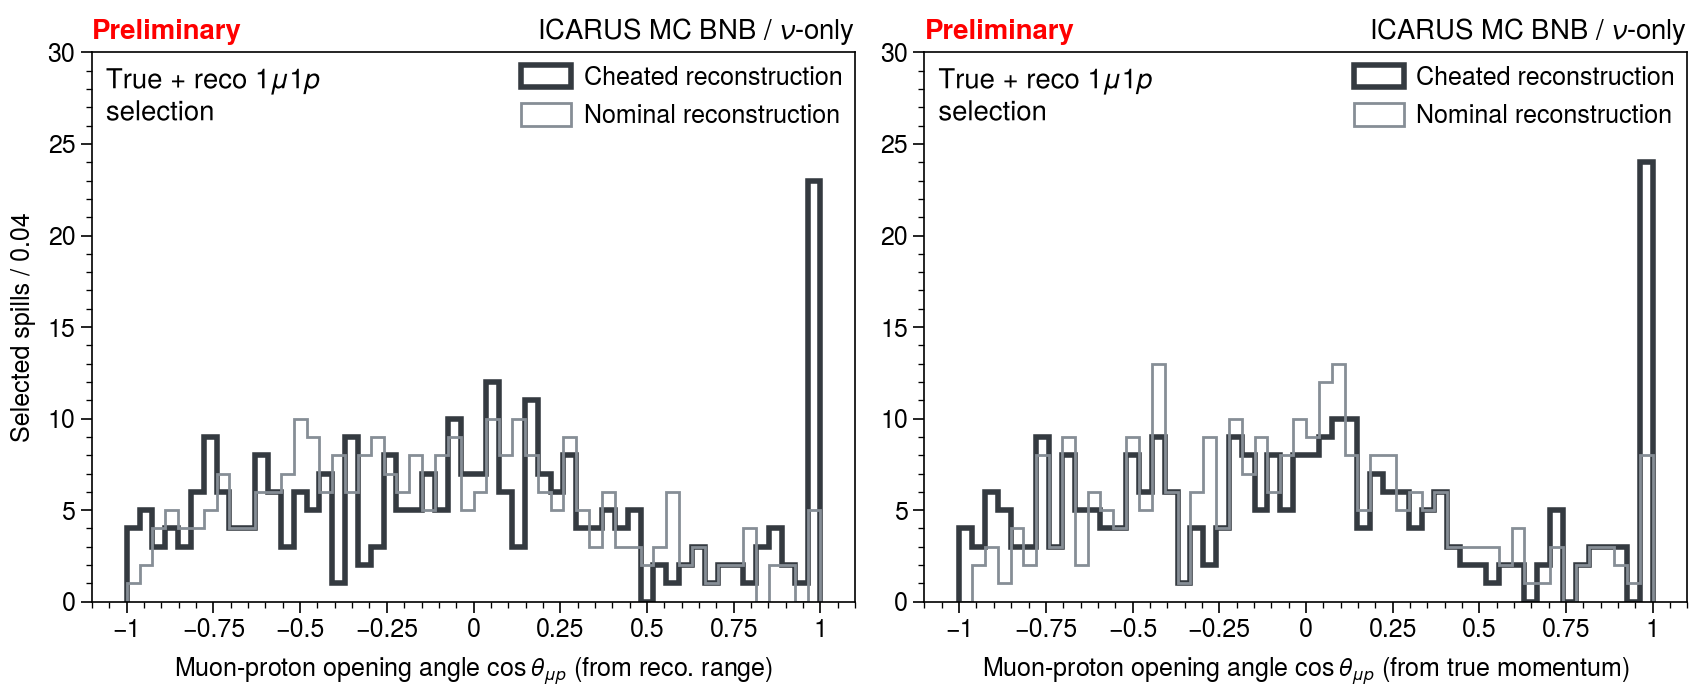

In [177]:
angle_bin = np.linspace(-1, 1, 55)

fig, ax = plot.subplots(
    width=8.5, height=3.5, ncols=2, nrows=1, 
    titlecolor='k', share=False, grid=False, sharey='labs',
    xlabel=r'Muon-proton opening angle $\cos\theta_{\mu p}$ (from reco. range)', ylabel=f'Selected spills / {(angle_bin.max()-angle_bin.min())/len(angle_bin):.2f}', 
    # titlesize=9,
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    ultitle='True + reco $1\\mu1p$\nselection'
)

bin_completeness = np.linspace(0, 1, 55)
ax.set_title('Preliminary', color='r', loc='left', weight='bold')

cheated_dict = {
    'color': 'gray8',
    'lw': 2,
    'ls': '-',
    'fill': False,
    'alpha': 1,
    'label': 'Cheated reconstruction'
}


nominal_dict = {
    'color': 'gray6',
    'lw': 1,
    'ls': '-',
    'fill': False,
    'alpha': 1,
    'label': 'Nominal reconstruction'
}

for data, properties in zip([cheated_1u1p, nominal_1u1p], [cheated_dict, nominal_dict]):
    ax[0].hist(data.CT3D_muon_leading_proton_from_rangeP.values, bins=angle_bin, **properties)
    ax[1].hist(data.CT3D_muon_leading_proton_from_trueP.values, bins=angle_bin, **properties)

ax.legend(loc='ur', ncols=1)
ax.format(ymax=30)
ax[1].format(xlabel=r'Muon-proton opening angle $\cos\theta_{\mu p}$ (from true momentum)')
fig.savefig('OA_reco_µp.pdf', bbox_inches='tight')

Naive observations:
 - l'opening angle tra µp nel caso cheated ha un picco a 1, che sembra voler dire che nella ricostruzione "cheated" si osservano più volte 1µ1p collineari
 - come compara questa cosa con altre variabili?

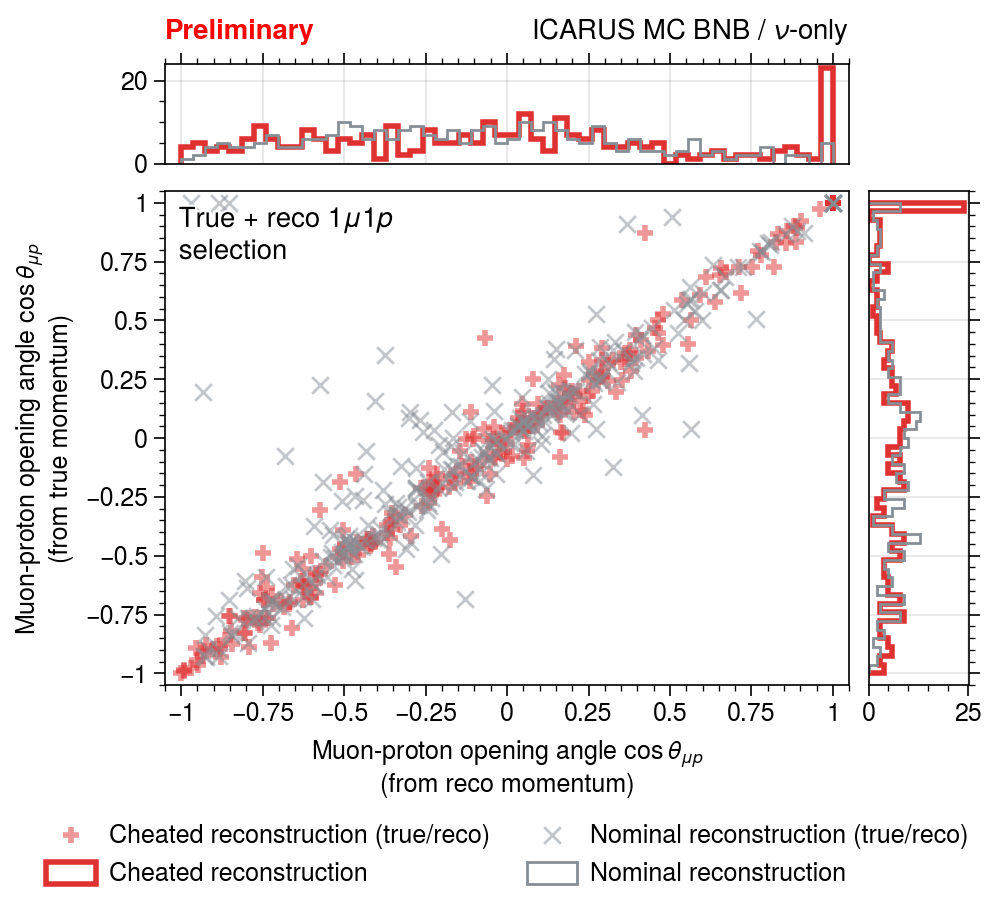

In [178]:
fig, ax = plot.subplots(
    width=5, height=4.5, ncols=1, nrows=1, 
    titlecolor='k', share=False, grid=False, sharey='labs', 
    # titlesize=9,
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    ultitle='True + reco $1\\mu1p$\nselection'
)

cheated_dict = {
    'color': 'red8',
    'lw': 2,
    'ls': '-',
    # 'fill': False,
    # 'alpha': 1,
    # 'label': 'Cheated reconstruction'
}


nominal_dict = {
    'color': 'gray6',
    'lw': 1,
    'ls': '-',
    # 'fill': False,
    # 'alpha': 1,
    # 'label': 'Nominal reconstruction'
}

top = ax.panel(side='t')
right = ax.panel(side='r')

# inset = ax.inset(bounds=(0.675, 0.075, 0.3, 0.3), zoom=True, ec='gray8', ls='-', transform='axes')
# inset.format(xlim=(0.95, 1.025), ylim=(0.95, 1.025))
ax.set_title('Preliminary', color='r', loc='left', weight='bold')
for data, properties, label, marker in zip([cheated_1u1p, nominal_1u1p], [cheated_dict, nominal_dict], ['Cheated reconstruction', 'Nominal reconstruction'], '+x'):
    ax.scatter(x=data.CT3D_muon_leading_proton_from_rangeP, y=data.CT3D_muon_leading_proton_from_trueP, **properties, alpha=0.5, marker=marker, label=f'{label} (true/reco)')
    # inset.scatter(x=data.CT3D_muon_leading_proton_from_rangeP, y=data.CT3D_muon_leading_proton_from_trueP, **properties, alpha=0.5, marker=marker)
    top.hist(data.CT3D_muon_leading_proton_from_rangeP.values, bins=angle_bin, **properties, fill=False, label=label)
    right.hist(data.CT3D_muon_leading_proton_from_trueP.values, bins=angle_bin, **properties, fill=False, orientation='horizontal')

ax.format(
    xlim=(-1.05, 1.05), ylim=(-1.05, 1.05), 
    xlabel='Muon-proton opening angle $\\cos\\theta_{\\mu p}$\n(from reco momentum)', 
    ylabel='Muon-proton opening angle $\\cos\\theta_{\\mu p}$\n(from true momentum)',
)
top.format(xlim=(-1.05, 1.05))
right.format(ylim=(-1.05, 1.05))
# inset.format(xlabel='', ylabel='')

fig.legend(loc='b', ncols=2)
fig.savefig('OA_true_reco_comparison_µp.pdf', bbox_inches='tight')

Fare lo stesso test confronto reco cheated e reco uncheated

Per poter fare questo test devo selezionare eventi comuni ai due, quindi devo aggiungere l'event number al dataframe, che posso sicuramente fare senza problema

Con il numero di evento, posso verificare quali sono gli eventi in comune con 

```python
cheated_1u1p[cheated_1u1p.event.isin(nominal_1u1p.event)]
```

(12016.0, True)
(12016.0, True)
(12829.0, True)
(12833.0, True)
(12016.0, True)
(12016.0, True)
(12829.0, True)
(12833.0, True)


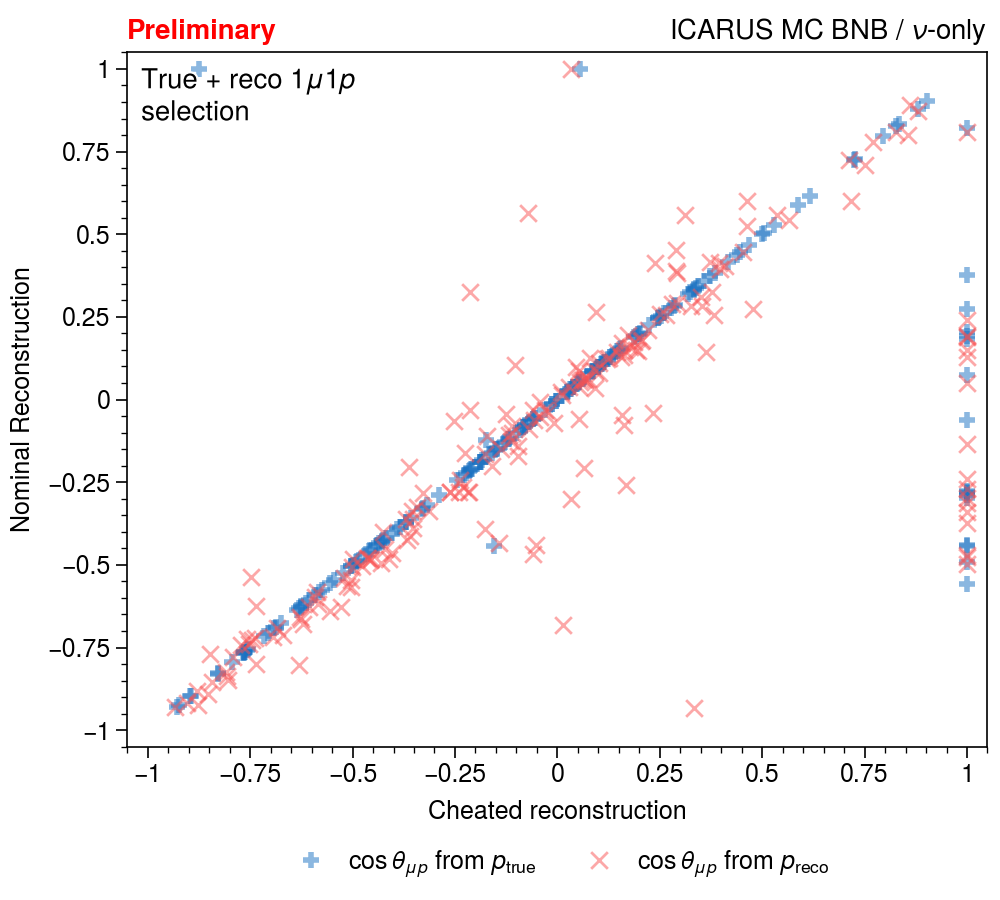

In [179]:
fig, ax = plot.subplots(
    width=5, height=4.5, ncols=1, nrows=1, 
    titlecolor='k', share=False, grid=False, sharey='labs', 
    # titlesize=9,
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    ultitle='True + reco $1\\mu1p$\nselection'
)

true_dict = {
    'color': 'blue8',
    'lw': 2,
    'ls': '-',
    # 'fill': False,
    # 'alpha': 1,
    'label': '$\\cos\\theta_{\\mu p}$ from $p_\\text{true}$'
}


reco_dict = {
    'color': 'red6',
    'lw': 1,
    'ls': '-',
    # 'fill': False,
    # 'alpha': 1,
    'label': '$\\cos\\theta_{\\mu p}$ from $p_\\text{reco}$'
}

ax.set_title('Preliminary', color='r', loc='left', weight='bold')
for data, properties, marker in zip(['CT3D_muon_leading_proton_from_trueP', 'CT3D_muon_leading_proton_from_rangeP'], [true_dict, reco_dict], '+x'):
    both_event_ids = pd.merge(cheated_1u1p[(cheated_1u1p[data] > -2)].event, nominal_1u1p[(nominal_1u1p[data] > -2)].event, on='event').event
    # both_event_ids = both_event_ids[(both_event_ids.event != 12016) & (both_event_ids.event != 12829) & (both_event_ids.event != 12833)].event
    testA = zip(cheated_1u1p[cheated_1u1p.event.isin(both_event_ids)][['event', 'CT3D_muon_leading_proton_from_rangeP', 'CT3D_muon_leading_proton_from_trueP']].sort_values('event').event, 
                cheated_1u1p[cheated_1u1p.event.isin(both_event_ids)][['event', 'CT3D_muon_leading_proton_from_rangeP', 'CT3D_muon_leading_proton_from_trueP']].sort_values('event').event.duplicated())
    testB = zip(nominal_1u1p[nominal_1u1p.event.isin(both_event_ids)][['event', 'CT3D_muon_leading_proton_from_rangeP', 'CT3D_muon_leading_proton_from_trueP']].sort_values('event').event,
                nominal_1u1p[nominal_1u1p.event.isin(both_event_ids)][['event', 'CT3D_muon_leading_proton_from_rangeP', 'CT3D_muon_leading_proton_from_trueP']].sort_values('event').event.duplicated())
    for a in testA:
        if a[1]:
            print(a)

    for a in testB:
        if a[1]:
            print(a)
    
    ax.scatter(
        x=cheated_1u1p[cheated_1u1p.event.isin(both_event_ids) & (cheated_1u1p[data] > - 9000)][data], 
        y=nominal_1u1p[nominal_1u1p.event.isin(both_event_ids) & (nominal_1u1p[data] > - 9000)][data], 
        **properties, alpha=0.5, marker=marker
    )

ax.format(xlim=(-1.05, 1.05), ylim=(-1.05, 1.05))
ax.format(xlabel='Cheated reconstruction', ylabel='Nominal Reconstruction')

fig.legend(loc='b', ncols=2)
fig.savefig('OA_cheated_nominal_comparison_µp.pdf', bbox_inches='tight')

## Available keys for plotting

In [180]:
cheated_1u1p.keys()

Index(['event', 'vertex_difference', 'vertex_difference_x',
       'vertex_difference_y', 'vertex_difference_z', 'muon_purity',
       'muon_completeness', 'leading_proton_purity',
       'leading_proton_completeness', 'muon_L_reco_true_ratio',
       'leading_proton_L_reco_true_ratio', 'muon_P_reco_true_ratio',
       'leading_proton_P_reco_true_ratio', 'muon_true_L',
       'leading_proton_true_L', 'muon_R', 'leading_proton_R', 'muon_rangeP',
       'leading_proton_rangeP', 'CT3D_muon_leading_proton_from_rangeP',
       'CT3D_muon_leading_proton_from_trueP'],
      dtype='object')

In [181]:
nominal_1u1p.keys()

Index(['event', 'vertex_difference', 'vertex_difference_x',
       'vertex_difference_y', 'vertex_difference_z', 'muon_purity',
       'muon_completeness', 'leading_proton_purity',
       'leading_proton_completeness', 'muon_L_reco_true_ratio',
       'leading_proton_L_reco_true_ratio', 'muon_P_reco_true_ratio',
       'leading_proton_P_reco_true_ratio', 'muon_true_L',
       'leading_proton_true_L', 'muon_R', 'leading_proton_R', 'muon_rangeP',
       'leading_proton_rangeP', 'CT3D_muon_leading_proton_from_rangeP',
       'CT3D_muon_leading_proton_from_trueP'],
      dtype='object')

## Duplicated events

In the events ID range [12000, 13000] there seeems to be some events which are duplicated... this is a preliminary investigation, but maybe for the final data analysis something more deep is required

(array([0., 0., 0., ..., 0., 0., 0.], shape=(17449,)),
 array([   50.5,    51.5,    52.5, ..., 17497.5, 17498.5, 17499.5],
       shape=(17450,)),
 <BarContainer object of 17449 artists>)

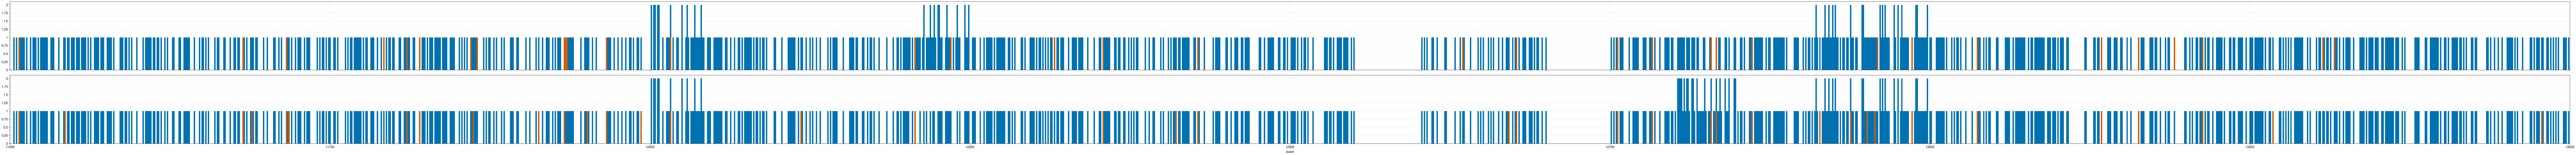

In [182]:
bins=np.arange(cheated_1u1p.event.min()-0.5, cheated_1u1p.event.max()+0.5, 1)
fig, ax = plot.subplots(width=100, height=6, nrows=2, xlim=(11_500, 13_500))

ax[0].hist(cheated_1u1p.event, bins=bins)
ax[0].hist(cheated_1u1p[cheated_1u1p.vertex_difference > -1].event, bins=bins)

ax[1].hist(nominal_1u1p.event, bins=bins)
ax[1].hist(nominal_1u1p[nominal_1u1p.vertex_difference > -1].event, bins=bins)


In [195]:
both_event_ids = pd.merge(cheated_1u1p[(cheated_1u1p.CT3D_muon_leading_proton_from_trueP > -2)].event, nominal_1u1p[(nominal_1u1p.CT3D_muon_leading_proton_from_trueP > -2)].event, on='event').event
for _, event in cheated_1u1p[cheated_1u1p.event.isin(both_event_ids) & (cheated_1u1p.CT3D_muon_leading_proton_from_trueP > -2)][['event', 'CT3D_muon_leading_proton_from_trueP']].iterrows():
    if event.CT3D_muon_leading_proton_from_trueP > 0.99:
        print(f'EVENT_ID = {event.event}')
        # print(f'µ R ={cheated_1u1p[cheated_1u1p.event == event.event].muon_R.values}')
        # print(f'p R ={cheated_1u1p[cheated_1u1p.event == event.event].leading_proton_R.values}')

EVENT_ID = 510.0
EVENT_ID = 851.0
EVENT_ID = 1021.0
EVENT_ID = 1713.0
EVENT_ID = 3382.0
EVENT_ID = 4143.0
EVENT_ID = 5216.0
EVENT_ID = 7443.0
EVENT_ID = 8327.0
EVENT_ID = 8666.0
EVENT_ID = 8896.0
EVENT_ID = 9747.0
EVENT_ID = 11682.0
EVENT_ID = 12986.0
EVENT_ID = 14556.0
EVENT_ID = 16606.0
EVENT_ID = 16738.0


(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  2.,  2.,  2.,  0.,  1.,  1.,  1.,  1.,  5.,  2.,
         2.,  4.,  7., 10.,  9.,  6., 10., 11., 16.,  9., 15., 16.,  9.,
        15., 12., 13., 17., 12., 24., 14., 14.,  6.,  5.]),
 array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
        0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
        0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
        0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
        0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
        0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
        0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
        0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
        0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
        0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ]),
 <a list of 1 Polygon objects>)

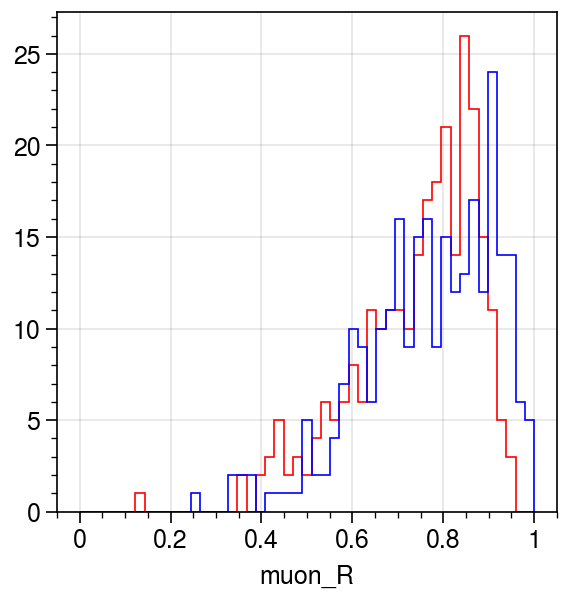

In [191]:

_, ax = plot.subplots()
ax.hist(cheated_1u1p.muon_R, bins=np.linspace(0, 1, 50), fill=False, color='r')
ax.hist(cheated_1u1p.leading_proton_R, bins=np.linspace(0, 1, 50), fill=False, color='b')